# Big Data and Data Mining
# Assignment
## Road Safety Project

### Student ID: 202111674

# Introduction
### Understanding the datasets

In [1]:
# load in the following libraries
import pandas as pd
import seaborn as sns
import numpy as np
import timeit
from contextlib import contextmanager
import matplotlib.pyplot as plt
%matplotlib inline

# analysis for sunrise and sunset
from suntime import Sun

# library for statistical modelling
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from scipy.stats import *
import statsmodels.api as sm

# library for data preprocessing
from sklearn.preprocessing import *  
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from keras.utils import np_utils
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import *
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.inspection import permutation_importance

# library for decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

# library for aprior algorithm 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 

# library for naive bayes model
from sklearn.naive_bayes import GaussianNB

# library for random forest model and AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier

# library for logistic regression
from sklearn.linear_model import LogisticRegression

# formatting the output pane
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format

#warning ignorer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data into python
df_accidents = pd.read_csv('Road Safety Data - Accidents 2019.csv')
df_casualties = pd.read_csv('Road Safety Data - Casualties 2019.csv')
df_vehicles = pd.read_csv('Road Safety Data- Vehicles 2019.csv')

In [3]:
# calculate total number of missing values
num_row, num_col = df_accidents.shape
num_fields_acc = num_row * num_col
print(f'There are {num_row} rows and {num_col} columns in the accident data')

print('=============================================================================')

num_missing_fields = df_accidents.isnull().sum().sum()
prop_missing_fields = round((num_missing_fields / num_fields_acc * 100),2)

print(f'The total number of missing fields in the accident data is: {num_missing_fields}')
print(f'The proportion of missing fields to the entire data is: {prop_missing_fields}%')

print('=============================================================================')

# Print the column name
print('Information on the accident data: ')
df_accidents.info()

There are 117536 rows and 32 columns in the accident data
The total number of missing fields in the accident data is: 5889
The proportion of missing fields to the entire data is: 0.16%
Information on the accident data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  in

In [4]:
# calculate total number of missing values
num_row, num_col = df_vehicles.shape
num_fields_veh = num_row * num_col
print(f'There are {num_row} rows and {num_col} columns in the vehicle data')

print('=============================================================================')

num_missing_fields = df_vehicles.isnull().sum().sum()
prop_missing_fields = round((num_missing_fields / num_fields_veh * 100),2)

print(f'The total number of missing fields in the vehicle data is: {num_missing_fields}')
print(f'The proportion of missing fields to the entire data is: {prop_missing_fields}%')

print('=============================================================================')

# Print the column name
print('Information on the vehicle data: ')
df_vehicles.info()

There are 216381 rows and 23 columns in the vehicle data
The total number of missing fields in the vehicle data is: 0
The proportion of missing fields to the entire data is: 0.0%
Information on the vehicle data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 

In [5]:
# calculate total number of missing values
num_row, num_col = df_casualties.shape
num_fields_cas = num_row * num_col
print(f'There are {num_row} rows and {num_col} columns in the casualty data')

print('=============================================================================')

num_missing_fields = df_casualties.isnull().sum().sum()
prop_missing_fields = round((num_missing_fields / num_fields_cas * 100),2)

print(f'The total number of missing fields in the casualty data is: {num_missing_fields}')
print(f'The proportion of missing fields to the entire data is: {prop_missing_fields}%')

print('=============================================================================')
# Print the column name
print('Information on the casualty data: ')
df_casualties.info()

There are 153158 rows and 16 columns in the casualty data
The total number of missing fields in the casualty data is: 0
The proportion of missing fields to the entire data is: 0.0%
Information on the casualty data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Locatio

# Data Cleaning and Feature Engineering
From the above extracts, we can see that there are no missing values under vehicle and casualty. With accidents dataset having 0.16% missing values, I have extracted the columns with the missing values for further investigation. Also in this section, I will carry out some feature engineering that can be of help to the data. Further feature engineering will be carried out in this course of this analysis. 

In [6]:
# extract the columns with missing dataset under accident data
null_cols = df_accidents.columns[df_accidents.isnull().any()]
df_accidents[null_cols].isnull().sum()

Location_Easting_OSGR          28
Location_Northing_OSGR         28
Longitude                      28
Latitude                       28
Time                           63
LSOA_of_Accident_Location    5714
dtype: int64

The missing values for longitude and latitude were fixed using a common denominator, as it is the attribute closest to a geospatial features for this missing value. 

In [7]:
# fixing missing values of latitude and longitude with the mean of the respective local authority highway
missing_rows = list(df_accidents.Longitude[df_accidents.Longitude.isnull()].index)

for i in missing_rows: 
    j = df_accidents.loc[i, "Local_Authority_(Highway)"]
    df_accidents.loc[i, 'Longitude'] = np.nanmean(df_accidents[ df_accidents["Local_Authority_(Highway)"] == j]['Longitude'])
    df_accidents.loc[i, 'Latitude'] = np.nanmean(df_accidents[ df_accidents["Local_Authority_(Highway)"] == j]['Latitude'])

In [8]:
#  fixing the missing Time with the highest occurence
df_accidents.Time.fillna(df_accidents.Time.mode()[0], inplace = True)

In [9]:
# build a class to help with the cleaning of the dataset 
class clean_df():
    def to_string(dataFrame, col_name):
        dataFrame[col_name] = dataFrame[col_name].apply(str)

    def datetime(dataFrame, col_name):
        dataFrame[col_name] = pd.to_datetime(dataFrame[col_name], errors='ignore')

In [10]:
# create a class to help create new columns of time
class time_df():
    def create_nCols(dataFrame):
        dataFrame['month'] = dataFrame.Date.dt.month
        dataFrame['month_name'] = dataFrame.Date.dt.month_name()
        dataFrame['day'] = dataFrame.Date.dt.day
        dataFrame['hour'] = dataFrame.Time.dt.hour
        dataFrame['minute'] = dataFrame.Time.dt.minute
        dataFrame['decimal_time'] = dataFrame.hour + dataFrame.minute/60

    def daytime(hour):
        if hour in [6, 7, 8, 9]: return "morning rush (6-9)"
        elif hour in [10, 11, 12, 13, 14]: return "off peak hours (10-14)"
        elif hour in [15, 16, 17, 18]: return "afternoon rush (15-18)"
        elif hour in [19, 20, 21, 22]: return "evening rush (19-22)"
        else: return "night (0-5)"

    def season(month):
        if month in [3, 4, 5]: return "spring"
        elif month in [6, 7, 8]: return "summer"
        elif month in [12, 1, 2]: return "winter"
        else: return "autumn"

In [11]:
# clean the dataset and create new columns
clean_df.datetime(df_accidents, 'Time')
clean_df.datetime(df_accidents, 'Date')
time_df.create_nCols(df_accidents)

df_accidents['day_time'] = df_accidents['hour'].apply(time_df.daytime)
df_accidents['season'] = df_accidents['month'].apply(time_df.season)

In [12]:
# convert the Accident_Index to string for all three datasets
df_2019 = [df_accidents, df_casualties, df_vehicles]

for i in df_2019:
    clean_df.to_string(i, 'Accident_Index')

In [13]:
""" the following columns were deleted the LSOA_location Location_Easting_OSGR and Location_Northing_OSGR 
    is similar to the longitude and latitude. LSOA_of_Accident_Location variable contains a lot of nan values.
    overall, there are of high cardinality
"""
to_del = ['Location_Easting_OSGR', 'Location_Northing_OSGR',
       'LSOA_of_Accident_Location']
       
df_accidents.drop(to_del, axis=1, inplace=True)

## Map the variable lookup
The mapping was done to help with visualization - as the respective names will be shown and it will be easier for readability and understanding of the dataset

In [14]:
# load the lookup sheets
var_lookup = pd.read_excel('variable lookup.xls', sheet_name=None)
var_lookup.keys()

dict_keys(['Introduction', 'Export Variables', 'Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Speed Limit', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend', 'Vehicle Type', 'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code', 'Casualty Class', 'Sex of Casualty', 'Age of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', '

In [15]:
# extract columns that matches with the variable lookup
for i in df_2019:
    columns_in_df = list()
    for col in i.columns:
        if col.lower().replace('_', ' ') in [key.lower() for key in var_lookup.keys()]:
            columns_in_df.append(col)
    print(columns_in_df)

['Police_Force', 'Accident_Severity', 'Day_of_Week', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 'Light_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards']
['Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Casualty_Severity', 'Car_Passenger', 'Casualty_Type']
['Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Junction_Location', 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', '1st_Point_of_Impact', 'Sex_of_Driver']


In [16]:
# rename some columns to match with the pattern from variable lookup
columns_renamed = {'Pedestrian_Crossing-Human_Control' : 'Ped Cross - Human',
'Pedestrian_Crossing-Physical_Facilities' : 'Ped Cross - Physical',
'Weather_Conditions' : 'Weather',
'Road_Surface_Conditions' : 'Road Surface',
'Urban_or_Rural_Area' : 'Urban Rural',
'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Officer Attend'}

df_accidents = df_accidents.rename(columns = columns_renamed)

In [17]:
# rename some columns to match with the pattern from variable lookup
columns_renamed = {'Vehicle_Location-Restricted_Lane' : 'Vehicle Location',
'Vehicle_Leaving_Carriageway' : 'Veh Leaving Carriageway', 'Was_Vehicle_Left_Hand_Drive?' : 'Was Vehicle Left Hand Drive',
'Age_Band_of_Driver' : 'Age Band', 'Propulsion_Code' : 'Vehicle Propulsion Code', 'Journey_Purpose_of_Driver' : 'Journey Purpose'}

df_vehicles = df_vehicles.rename(columns = columns_renamed)

In [18]:
# rename some columns to match with the pattern from variable lookup
columns_renamed = {'Pedestrian_Location' : 'Ped Location', 'Pedestrian_Movement' : 'Ped Movement',
'Bus_or_Coach_Passenger' : 'Bus Passenger', 'Pedestrian_Road_Maintenance_Worker' : 'Ped Road Maintenance Worker',
'Casualty_Home_Area_Type' : 'Home Area Type', 'Casualty_IMD_Decile' : 'IMD Decile'}

df_casualties = df_casualties.rename(columns = columns_renamed)

In [19]:
# duplicate the dataframe in order to assigned the variable
df_accidents_assigned = df_accidents.copy()
df_vehicles_assigned = df_vehicles.copy()
df_casualties_assigned = df_casualties.copy()

In [20]:
# create a fucntion to help map the code in the dataframe to the label
def map_variable(df):
    var_dict = dict()
    df.columns = [each_col.lower() for each_col in df.columns]
    for i, j in zip(df['code'], df['label']):
        var_dict[i] = j
    return var_dict

In [21]:
# iterate through the columns to map the code
for col in df_accidents.columns:
    for key in list(var_lookup.keys()):
        if col.lower().replace('_', ' ') == key.lower():
            df_accidents_assigned[col] = df_accidents[col].map(map_variable(var_lookup[key]), na_action='ignore')
            break

for col in df_vehicles.columns:
    for key in list(var_lookup.keys()):
        if col.lower().replace('_', ' ') == key.lower():
            df_vehicles_assigned[col] = df_vehicles[col].map(map_variable(var_lookup[key]), na_action='ignore')
            break

for col in df_casualties.columns:
    for key in list(var_lookup.keys()):
        if col.lower().replace('_', ' ') == key.lower():
            df_casualties_assigned[col] = df_casualties[col].map(map_variable(var_lookup[key]), na_action='ignore')
            break

# Data Exploration

## Descriptive analysis
The accidents dataset has a one-to-many relationship to the vehicles and casualties dataset with accident index serving as the primary and foreign key. 

In [22]:
# merge the datasets into one dataset to help with visualisation
df_veh_cas = pd.merge(df_vehicles_assigned, df_casualties_assigned, on=['Accident_Index','Vehicle_Reference'], how='inner')
df_assigned = pd.merge(df_accidents_assigned, df_veh_cas, on='Accident_Index', how='inner')
df_acc_veh = pd.merge(df_accidents_assigned, df_vehicles_assigned, on='Accident_Index', how='inner')
df_acc_cas = pd.merge(df_accidents_assigned, df_casualties_assigned, on='Accident_Index', how='inner')

# merge the unassigned datasets for modelling
df_acc_veh2 = pd.merge(df_accidents, df_vehicles, on='Accident_Index', how='inner')
df_acc_cas2 = pd.merge(df_accidents, df_casualties, on='Accident_Index', how='inner')
df = pd.merge(df_vehicles, df_casualties, on=['Accident_Index','Vehicle_Reference'], how='inner')
df = pd.merge(df_accidents, df, on='Accident_Index', how='inner')

print(df.shape)

(153158, 73)


### Accidents Info

In [23]:
# descriptive analysis of number of vehicles and casualties
print(df_accidents_assigned[ ['Number_of_Vehicles', 'Number_of_Casualties'] ].describe())

       Number_of_Vehicles  Number_of_Casualties
count         117536.0000           117536.0000
mean               1.8410                1.3031
std                0.7084                0.7544
min                1.0000                1.0000
25%                1.0000                1.0000
50%                2.0000                1.0000
75%                2.0000                1.0000
max               17.0000               52.0000


On average, two vehicles are involved in an accident whilst on average the number of casualties is one. The maximum casualties of 52 can be described as disaster considering it's awkwardly higher than the rest of the other distribution.

In [24]:
# determine the number of casualties
p = df_casualties_assigned[['Casualty_Severity', 'Accident_Index']].groupby(['Casualty_Severity'], as_index=True).agg({"Accident_Index": "count" }).rename(columns={'Accident_Index':'Num of Casualties'}).sort_values(by=['Num of Casualties'], ascending=False)
p = p.assign(Percentage = lambda x: (x['Num of Casualties'] / x['Num of Casualties'].sum() * 100))
print(p)

                   Num of Casualties  Percentage
Casualty_Severity                               
Slight                        125461     81.9161
Serious                        25945     16.9400
Fatal                           1752      1.1439


The table above shows that there is a class imbalance within our dataset. The imbalance will be dealt with by focusing on model evaluation metrics which are suited to imbalance class, balanced accuracy or recall instead of accuracy. In addition, I will use oversampling to create a balanced dataset and then test the model's performance on it.

In [25]:
# determine the number of accidents per casualty type
p = df_acc_cas[['Casualty_Class', 'Accident_Index']].groupby(['Casualty_Class'], as_index=True).agg({"Accident_Index": "count" }).rename(columns={'Accident_Index':'Num of Accidents'}).sort_values(by=['Num of Accidents'], ascending=False)
p = p.assign(Percentage = lambda x: (x['Num of Accidents'] / x['Num of Accidents'].sum() * 100))
print(p)

                 Num of Accidents  Percentage
Casualty_Class                               
Driver or rider             99290     64.8285
Passenger                   32098     20.9574
Pedestrian                  21770     14.2141


### Time period

[Text(0.5, 0, 'Number of Accidents')]

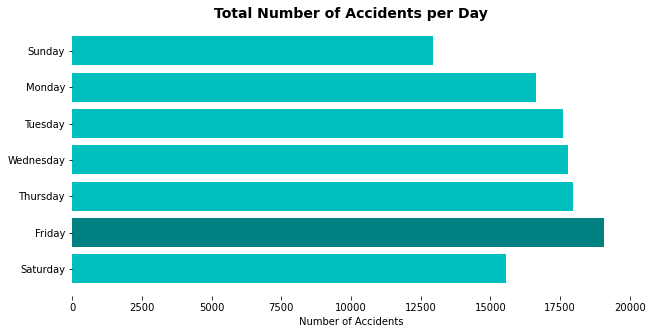

In [26]:
# plotting number of accidents per day
days = ['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday']

# get count
daily_count = df_accidents_assigned["Day_of_Week"].value_counts().sort_index(ascending=False).reindex(days)

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
colors = ['c', 'teal', 'c', 'c', 'c', 'c', 'c']
sns.despine(left=True, bottom=True)

# plot horizontal barchart
ax.barh(daily_count.index, daily_count.values, color=colors)
ax.set_title('Total Number of Accidents per Day', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Accidents')


[Text(0.5, 0, 'Average Number of Casualties')]

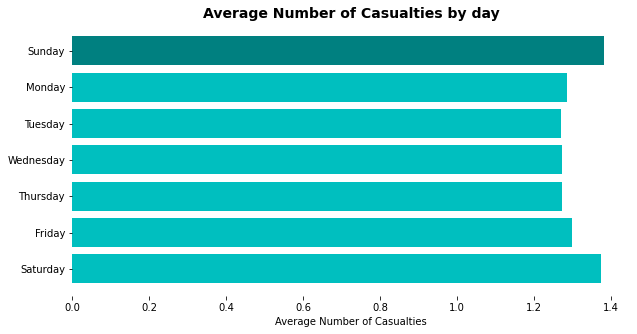

In [27]:
# plotting number of accidents per day
days = ['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday']

# get count
daily_count = df_accidents_assigned.groupby('Day_of_Week')['Number_of_Casualties'].mean().sort_index(ascending=False).reindex(days)

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
colors = ['c', 'c', 'c', 'c', 'c', 'c', 'teal']
sns.despine(left=True, bottom=True)

# plot horizontal barchart
ax.barh(daily_count.index, daily_count.values, color=colors)
ax.set_title('Average Number of Casualties by day', fontsize=14, fontweight='bold')
ax.set(xlabel='Average Number of Casualties')

The chart above shows that on average the number of casualties are higher in the weekends even though the number of accidents are lower. Given that its the weekend, there is a lot of people or tourists travelling or moving around in bigger vehicles. 

skewness of normal distribution (should be 0): -0.42772711457380824


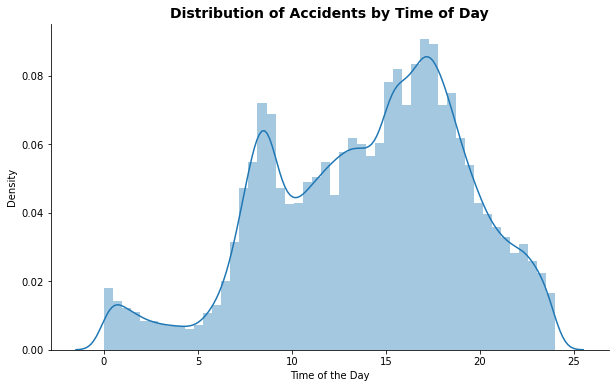

In [28]:
# prepare plot
fig, ax = plt.subplots(figsize=(10,6))
sns.despine()

# plot density plot
ax = sns.distplot(df_accidents.decimal_time)
ax.set_title('Distribution of Accidents by Time of Day', fontsize=14, fontweight='bold')
ax.set(xlabel='Time of the Day', ylabel='Density')

# determine the skewness 
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df_accidents.decimal_time) ))

In [29]:
# build a function for shapiro test 
def shapiro_test(data, alpha):
	stat, p = shapiro(data)
	print('stat=%.3f, p=%.3f' % (stat, p))
	if p > alpha:
		print('There is no significant period (fail to reject H0)')
	else:
		print('There is significant period (reject H0)')

# build a function for one-way anova f-test 
def anova_test(data1, data2, alpha):
    F, p = stats.f_oneway(data1, data2)
    print('F Statistics = %.3f, p = %.3f' % (F, p)) 
    if p > alpha:
        print('There is no significant period (fail to reject H0)')
    else:
        print('There is significant period (reject H0) ')

In [30]:
# shapiro test on the significant hour of the day
p = pd.DataFrame(df_accidents_assigned["decimal_time"].value_counts())
shapiro_test(p.decimal_time, 0.05)

stat=0.524, p=0.000
There is significant period (reject H0)


The shapiro test at 5% level of confidence proves that there are significant hours of the day in which there are more accidents.

Text(69.0, 0.5, '')

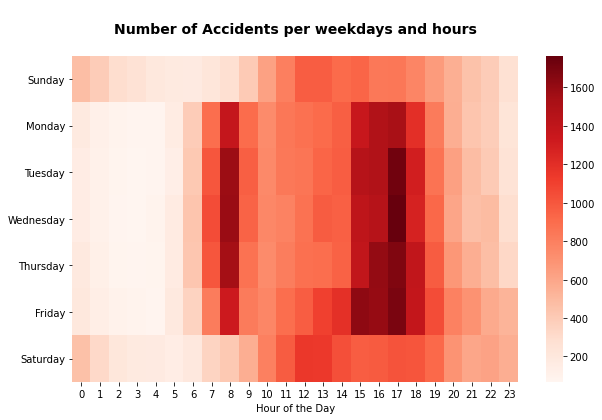

In [31]:
# get data
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_weeks = df_accidents_assigned.groupby(['Day_of_Week', 'hour']).size().unstack('hour')\
                                    .reindex(days)

# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_weeks, cmap='Reds')
plt.title('\nNumber of Accidents per weekdays and hours\n', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day')
plt.ylabel('')

In [32]:
# shapiro test on the significant day of the week
p = pd.DataFrame(df_accidents_assigned["Day_of_Week"].value_counts())
shapiro_test(p.Day_of_Week, 0.05)

stat=0.902, p=0.341
There is no significant period (fail to reject H0)


The shapiro test at 5% level of confidence proves that there are no significant day of the week in which there are more accidents.

In [33]:
# total number of accidents by season
df_accidents_assigned["season"].value_counts()

autumn    30825
summer    29550
spring    28791
winter    28370
Name: season, dtype: int64

The table above shows that there are more accident during autumn than the other period. There is a general reasoning for this and it is because nights are shortening as well as the weather becoming so unpredictable - it is oftern wetter and less smooth to drive during this period. I will test an hypothesis to determine the impact of daylight on the accidents occuring.

[Text(0.5, 0, 'Number of Accidents'), Text(0, 0.5, '')]

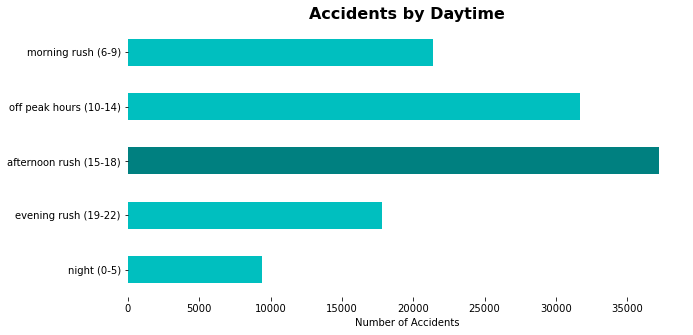

In [34]:
# prepare dataframe
order = ['night (0-5)', 'evening rush (19-22)', 'afternoon rush (15-18)', 'off peak hours (10-14)', 'morning rush (6-9)']
df_daytime = df_accidents_assigned.groupby('day_time').size().reindex(order)

# prepare plot 
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['c', 'c', 'teal', 'c', 'c']
sns.despine(left=True, bottom=True)

# plot horizontal barchart
df_daytime.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Accidents by Daytime', fontsize=16, fontweight='bold')
ax.set(xlabel='Number of Accidents', ylabel='')

The chart above confirms the heatmap which shows that there are more accidents during the afternoon rush and off peak hours. The afternoon is usually when kids are off from school and there is a high chances of accident occuring.

In [35]:
# build a table showing the proportion of accident severity per time of day
p = df_accidents_assigned.groupby(['day_time', 'Accident_Severity']).size().unstack('Accident_Severity')
p['Count'] = p.sum(axis=1)
p = p.sort_values("Count", ascending = False)
p = p.join(p.div(p['Count'], axis=0), rsuffix=' in %')
q = p.drop(columns=['Fatal', 'Serious', 'Slight','Count in %'], axis=1)
print(q)

# data for chart
p = p.drop(columns=['Fatal', 'Serious', 'Slight', 'Count', 'Count in %'], axis=1)

Accident_Severity       Count  Fatal in %  Serious in %  Slight in %
day_time                                                            
afternoon rush (15-18)  37242      0.0112        0.1962       0.7925
off peak hours (10-14)  31691      0.0144        0.1930       0.7926
morning rush (6-9)      21381      0.0099        0.1782       0.8119
evening rush (19-22)    17834      0.0160        0.2172       0.7668
night (0-5)              9388      0.0306        0.2464       0.7231


[Text(0.5, 0, 'Number of Accidents')]

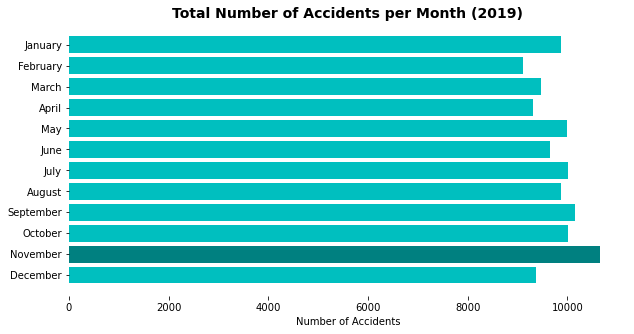

In [36]:
# plotting number of accidents per day
months = ['December', 'November', 'October', 'September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January']

# get count
daily_count = df_accidents_assigned["month_name"].value_counts().sort_index(ascending=False).reindex(months)

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
colors = ['c', 'teal', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']
sns.despine(left=True, bottom=True)

# plot horizontal barchart
ax.barh(daily_count.index, daily_count.values, color=colors)
ax.set_title('Total Number of Accidents per Month (2019)', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Accidents')

Text(69.0, 0.5, '')

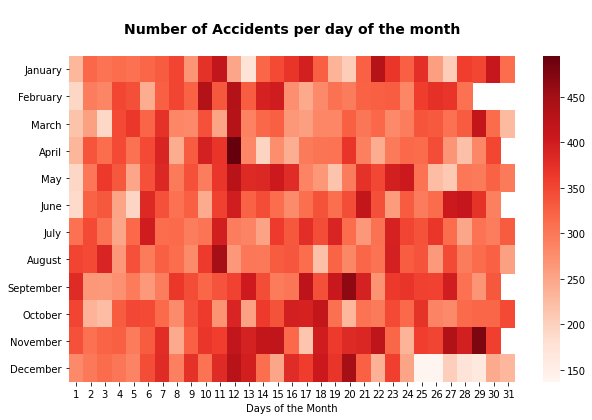

In [37]:
# get data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_weeks = df_accidents_assigned.groupby(['month_name', 'day']).size().unstack('day')\
                                    .reindex(months)

# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_weeks, cmap='Reds')
plt.title('\nNumber of Accidents per day of the month\n', fontsize=14, fontweight='bold')
plt.xlabel('Days of the Month')
plt.ylabel('')

The chart above shows that there are less accidents in December which suggest that there are less people travelling due to the severe weather condition. It also shows that number of accidents increased from Septemeber to November, as earlier shown by the autumn description due to the weather condition. Nevertheless, from May to July, the accidents recorded are relatively on the same average. As expected, the lowest number of accidents is happening on December 25 (christmas day) due to an increased number of poeple spending the festive period with their loved ones. The the following days, in christmas' holidays, have low averages. Generally, the number of accidents occuring on the first day of each month is on average lower compared to other days.

### Casualties

[Text(0.5, 0, 'Number of Casualties')]

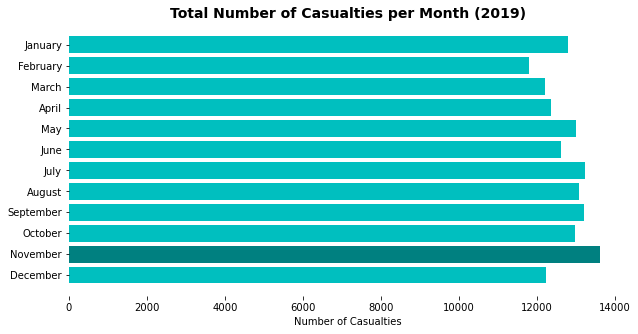

In [38]:
# plotting number of accidents per day
months = ['December', 'November', 'October', 'September', 'August', 'July', 'June', 'May', 'April', 'March', 'February', 'January']

# get count
daily_count = df_accidents_assigned.groupby('month_name')['Number_of_Casualties'].sum().reindex(months)

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
colors = ['c', 'teal', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']
sns.despine(left=True, bottom=True)

# plot horizontal barchart
ax.barh(daily_count.index, daily_count.values, color=colors)
ax.set_title('Total Number of Casualties per Month (2019)', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Casualties')

Text(0.5, 0, 'day of accident')

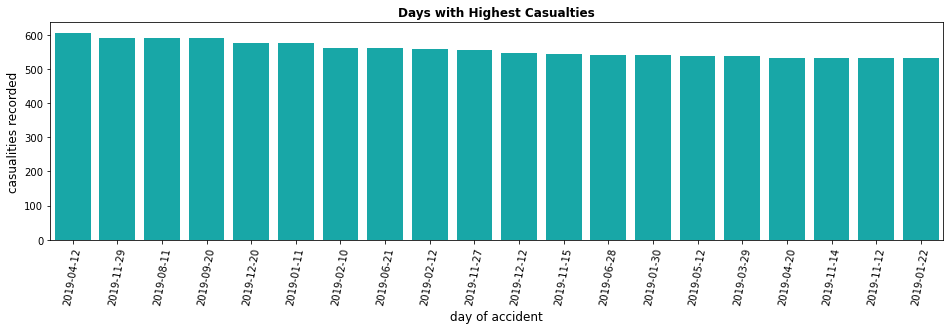

In [39]:
# get data
p = df_accidents.groupby(['Date'])['Date', 'Number_of_Casualties'].sum().sort_values(by=['Number_of_Casualties'], ascending=False).head(20)
p = p.reset_index()
p['Date'] = p.astype({'Date':'str'})

# plot table
plt.figure(figsize=(16,4))
sns.despine()

# plot bar chart
ax = sns.barplot(p['Date'], p['Number_of_Casualties'], color = 'c')
plt.title("Days with Highest Casualties", fontweight='bold')
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('casualities recorded', fontsize=12)
plt.xlabel('day of accident', fontsize=12)

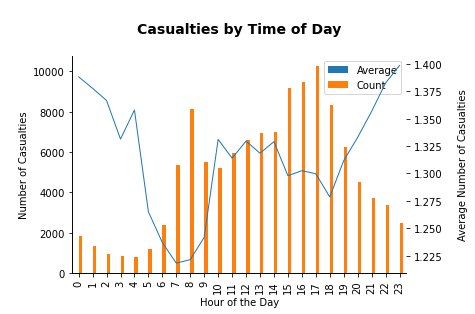

In [40]:
cas_count = df_accidents_assigned.groupby('hour')['Number_of_Casualties'].count()
cas_average = df_accidents_assigned.groupby('hour')['Number_of_Casualties'].mean()
cas_count_ave = pd.DataFrame({'Average': cas_average, "Count": cas_count})

ax = cas_count_ave.plot(kind='bar')
ax.set_title('\nCasualties by Time of Day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='\nNumber of Casualties')

ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),
   cas_count_ave[['Average']].values,
   linestyle='-', linewidth=1.0)

ax2.set_ylabel('\nAverage Number of Casualties')

# remove all spines
sns.despine()

There are more casualties during the day due to the high frequency of accidents. However, on average the casualties per accident is more at midnight.

### Police Force

In [41]:
# determine the number of police officer going to the accidents scene
p = df_accidents_assigned[['Police Officer Attend', 'Accident_Index']].groupby(['Police Officer Attend'], as_index=True).agg({"Accident_Index": "count" }).rename(columns={'Accident_Index':'Count'}).sort_values(by=['Count'], ascending=False)
p = p.assign(Percentage = lambda x: (x['Count'] / x['Count'].sum() * 100))
print(p)

                                                    Count  Percentage
Police Officer Attend                                                
Yes                                                 81309     69.1780
No                                                  26285     22.3634
No - accident was reported using a self complet...   9942      8.4587


In [42]:
# build a table showing the proportion of accident severity conditioned on a police attending the scene
p = pd.crosstab(df_accidents_assigned['Police Officer Attend'], df_accidents_assigned['Accident_Severity']).apply(lambda x: x/x.sum(), axis = 0)
print(p)

Accident_Severity                                   Fatal  Serious  Slight
Police Officer Attend                                                     
No                                                 0.1001   0.1559  0.2430
No - accident was reported using a self complet... 0.0006   0.0251  0.1012
Yes                                                0.8993   0.8190  0.6558


Overall, the chance that a police officer will attend a scene of the accident is roughly 69%. You will observe that the chance of a police officer attending a scene of a slight accident is lower compared to others - which is expected.

Hence, the chance of a police officer attending a scene of the accident is highly correlated with the severity of the accident. You will observe that the more severity, there is an increase likelihood that a police officer will be at the scene. This feature won't be used to predict the casualty severity due to it's high correlation with the accident severity, also, it doesn't play a role in the accident happening.

### Motorbikes 

skewness of normal distribution (should be 0): -0.5024095039386366


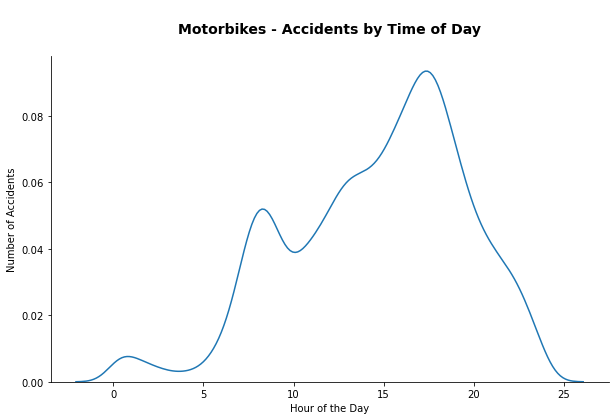

In [43]:
# distribution of accidents per time of the day for motorbikes
motorbikes = ['Motorcycle over 125cc and up to 500cc',
       'Motorcycle 125cc and under', 'Motorcycle over 500cc',
       'Motorcycle 50cc and under', 'Motorcycle - unknown cc',
       'Electric motorcycle']

df_motorbikes = df_acc_veh[df_acc_veh['Vehicle_Type'].isin(motorbikes)]

# prepare plot
fig, ax = plt.subplots(figsize=(10,6))
sns.despine(top=True, right=True)

# plot density chart
ax = sns.kdeplot(df_motorbikes.decimal_time)
ax.set_title('\nMotorbikes - Accidents by Time of Day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')

# determine the skewness 
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df_motorbikes.hour) ))

In [44]:
# shapiro test on the significant hour of the day
p = pd.DataFrame(df_motorbikes["decimal_time"].value_counts())
shapiro_test(p.decimal_time, 0.05)

stat=0.563, p=0.000
There is significant period (reject H0)


Under motorbikes, the shapiro test at 5% level of confidence proves that there are significant hours of the day in which there are more accidents.

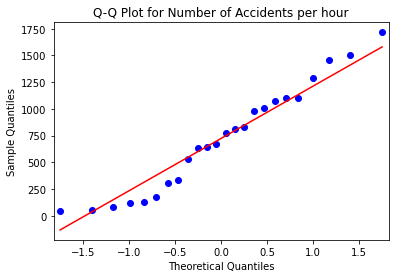

In [45]:
# test the significant hour of the day (motorbikes)
p = pd.DataFrame(df_motorbikes["hour"].value_counts())
qqplot(p.hour, line='s')
plt.title('Q-Q Plot for Number of Accidents per hour')
plt.show()

The qq plot also confirms the position of the shapiro test.

[Text(0.5, 0, '\nNumber of Accidents')]

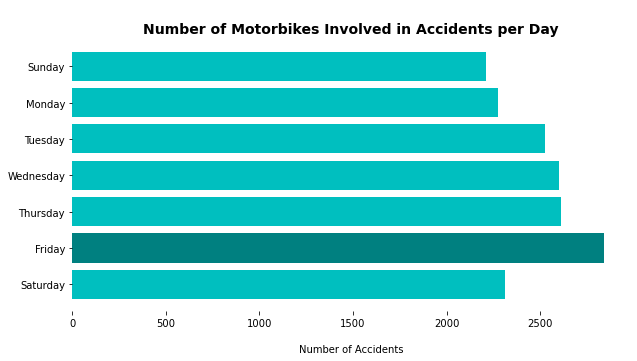

In [46]:
# plotting number of accidents per day
days = ['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday']

# get count
daily_count = df_motorbikes["Day_of_Week"].value_counts().sort_index(ascending=False).reindex(days)

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
colors = ['c', 'teal', 'c', 'c', 'c', 'c', 'c']
sns.despine(left=True, bottom=True)

# plot horizontal barchart
ax.barh(daily_count.index, daily_count.values, color=colors)
ax.set_title('\nNumber of Motorbikes Involved in Accidents per Day', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of Accidents')

In [47]:
# shapiro test on the significant day of the week
p = pd.DataFrame(df_motorbikes["Day_of_Week"].value_counts())
shapiro_test(p.Day_of_Week, 0.05)

stat=0.933, p=0.578
There is no significant period (fail to reject H0)


Again, the shapiro test at 5% level of confidence proves that there are no significant day of the week in which there are more accidents for motorbikes.

### Pedestrians

skewness of normal distribution (should be 0): -0.5145442074881439


[Text(0.5, 0, 'Hour of the Day'), Text(0, 0.5, 'Number of Accidents')]

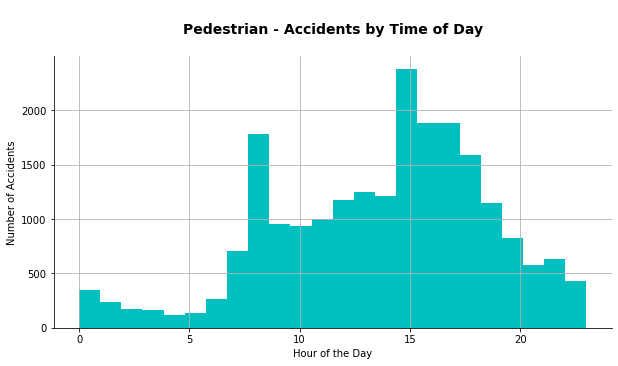

In [48]:
# distribution of accidents per time of the day for pedestrian
df_ped = df_acc_cas[df_acc_cas['Casualty_Class'].isin(['Pedestrian'])]

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
sns.despine()

# determine the skewness 
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df_ped.hour) ))

# plot barchart
df_ped.hour.hist(bins=24, ax=ax, color='c')
ax.set_title('\nPedestrian - Accidents by Time of Day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')

In [49]:
# shapiro test on the significant hour of the day
p = pd.DataFrame(df_ped["decimal_time"].value_counts())
shapiro_test(p.decimal_time, 0.05)

stat=0.496, p=0.000
There is significant period (reject H0)


The shapiro test at 5% level of confidence proves that there are significant hours of the day in which there are more accidents involving pedestrians.

[Text(0.5, 0, 'Number of Accidents')]

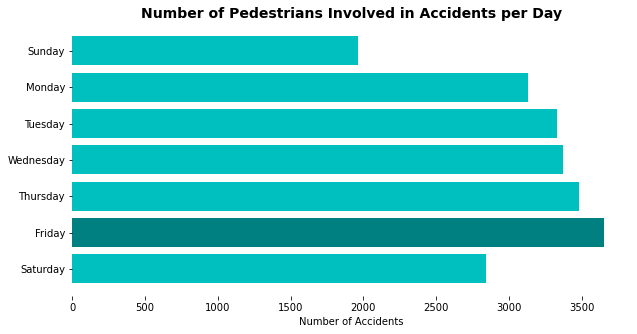

In [50]:
# plotting number of accidents per day
days = ['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday']

# get count
daily_count = df_ped["Day_of_Week"].value_counts().sort_index(ascending=False).reindex(days)

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
colors = ['c', 'teal', 'c', 'c', 'c', 'c', 'c']
sns.despine(left=True, bottom=True)

ax.barh(daily_count.index, daily_count.values, color=colors)
ax.set_title('Number of Pedestrians Involved in Accidents per Day', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Accidents')


In [51]:
# shapiro test on the significant day of the week
p = pd.DataFrame(df_ped["Day_of_Week"].value_counts())
shapiro_test(p.Day_of_Week, 0.05)

stat=0.845, p=0.111
There is no significant period (fail to reject H0)


Again, the shapiro test at 5% level of confidence proves that there are no significant day of the week in which there are more accidents involving pedestrians.

### Daylight Savings

In [52]:
# get data
# DST started on 31 Mar 2019, I extracted data a week before and after
df_dst_start = df_accidents_assigned [ df_accidents_assigned.Date.between('2019-03-24', '2019-04-07')]
start_dst = df_dst_start.groupby('Date')['Accident_Index'].count()


# DST ended on 27 Oct 2019, I extracted data a week after  week before and after
df_dst_end = df_accidents_assigned [ df_accidents_assigned.Date.between('2019-10-20', '2019-11-03')]
end_dst = df_dst_end.groupby('Date')['Accident_Index'].count()

Text(10, -40, 'Start DST')

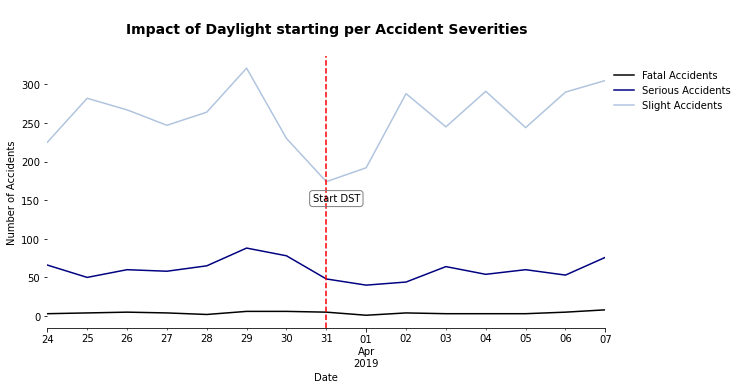

In [53]:
# DST started on 31 Mar 2019, I extracted data a week before and after
df_dst_start = df_accidents_assigned [ df_accidents_assigned.Date.between('2019-03-24', '2019-04-07')]

# groupby year and severities
p = df_dst_start.groupby(['Date', 'Accident_Severity']).size().unstack('Accident_Severity')

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
colors=['black', 'navy', 'lightsteelblue']
sns.despine(left=True)

# plot line chart
p.plot(color=colors, ax=ax)
ax.set_title('\nImpact of Daylight starting per Accident Severities\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Number of Accidents', xlabel='Date')
ax.legend(labels=['Fatal Accidents', 'Serious Accidents', 'Slight Accidents'], 
          bbox_to_anchor=(1, 0.98), frameon=False)
ax.axvline("2019-03-31", color="red", linestyle="--")
ax.annotate("Start DST", xy=('2019-03-31', 200),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            )


Text(10, -40, 'End DST')

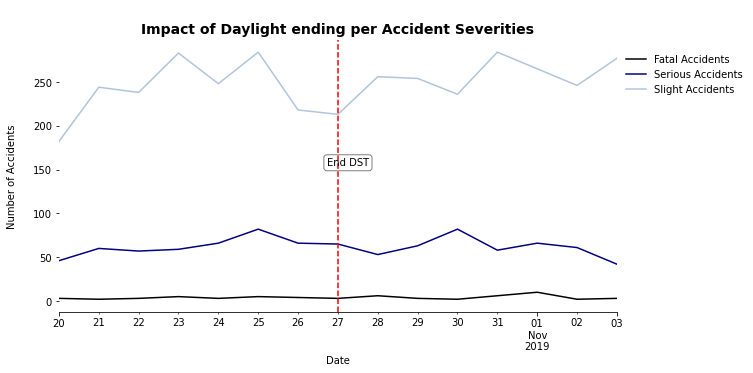

In [54]:
# DST ended on 27 Oct 2019, I extracted data a week before and after
df_dst_end = df_accidents_assigned [ df_accidents_assigned.Date.between('2019-10-20', '2019-11-03')]

# groupby year and severities
p = df_dst_end.groupby(['Date', 'Accident_Severity']).size().unstack('Accident_Severity')

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
colors=['black', 'navy', 'lightsteelblue']
sns.despine(left=True)

# plot line chart
p.plot(color=colors, ax=ax)
ax.set_title('\nImpact of Daylight ending per Accident Severities', fontsize=14, fontweight='bold')
ax.set(ylabel='Number of Accidents\n', xlabel='Date')
ax.legend(labels=['Fatal Accidents', 'Serious Accidents', 'Slight Accidents'], 
          bbox_to_anchor=(1, 0.98), frameon=False)
ax.axvline("2019-10-27", color="red", linestyle="--")
ax.annotate("End DST", xy=('2019-10-27', 200),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            )


In [55]:
# build a paired sampled t test function
def t_test(arr1, arr2, alpha):
    stat, p = ttest_rel(arr1, arr2)
    print('Average number of accidents, array 1 = %.3f, array 2 = %.3f' % (arr1.mean(), arr2.mean()))
    print('T Statistics = %.3f, p = %.3f' % (stat, p))
    if p > alpha:
        print('There is no impact (fail to reject H0)')
    else:
        print('There is impact (reject H0)')

In [56]:
# impact of DST when it starts
t_test(start_dst[:7], start_dst[8:], 0.05)

Average number of accidents, array 1 = 333.000, array 2 = 324.714
T Statistics = 0.427, p = 0.685
There is no impact (fail to reject H0)


In [57]:
# impact of DST when it starts
t_test(end_dst[:7], end_dst[8:], 0.05)

Average number of accidents, array 1 = 308.286, array 2 = 325.000
T Statistics = -1.016, p = 0.349
There is no impact (fail to reject H0)


### Sunrise and Sunset

In [58]:
# ref: https://pypi.org/project/suntime/
# get decimal time
def dec_time(col):
    hour = df_accidents_assigned[col].dt.hour
    min = df_accidents_assigned[col].dt.minute
    dec = hour + min/60
    return dec

# get the sunrise and sunset time per date
def get_sunrise_sunset(latitude, longitude, date):
    sun = Sun(latitude, longitude)
    sunrise = sun.get_local_sunrise_time(date).strftime('%H:%M')
    sunset = sun.get_local_sunset_time(date).strftime('%H:%M')
    return sunrise, sunset

In [59]:
# get the sunrise and sunset time
sun_df = df_accidents_assigned[['Latitude', 'Longitude', 'Date']]

df_accidents_assigned["SunRise"] = sun_df.apply(lambda x : get_sunrise_sunset(*x)[0], axis=1)
df_accidents_assigned["SunSet"] = sun_df.apply(lambda x : get_sunrise_sunset(*x)[1], axis=1)

In [60]:
# convert to timestamp
clean_df.datetime(df_accidents_assigned, 'SunRise')
clean_df.datetime(df_accidents_assigned, 'SunSet')

# convert to decimal time
df_accidents_assigned["SunRise"] = dec_time("SunRise")
df_accidents_assigned["SunSet"] = dec_time("SunSet")

In [61]:
# minute range
min_range = 30/60

# determine records pre and post to sunrise
df_accidents_assigned['SunRise_pre'] = df_accidents_assigned.decimal_time.between(
    (df_accidents_assigned.SunRise - min_range),(df_accidents_assigned.SunRise))

df_accidents_assigned['SunRise_post'] = df_accidents_assigned.decimal_time.between(
    (df_accidents_assigned.SunRise),(df_accidents_assigned.SunRise + min_range))

# get data per day of week
df_sr_pre = df_accidents_assigned[df_accidents_assigned.SunRise_pre == True]
df_sr_pre = df_sr_pre.groupby('Day_of_Week')['Accident_Index'].count()

# get data per day of week
df_sr_post = df_accidents_assigned[df_accidents_assigned.SunRise_post == True]
df_sr_post = df_sr_post.groupby('Day_of_Week')['Accident_Index'].count()

In [62]:
# determine records pre and post to sunrise
df_accidents_assigned['SunSet_pre'] = df_accidents_assigned.decimal_time.between(
    (df_accidents_assigned.SunSet - min_range),(df_accidents_assigned.SunSet))

df_accidents_assigned['SunSet_post'] = df_accidents_assigned.decimal_time.between(
    (df_accidents_assigned.SunSet),(df_accidents_assigned.SunSet + min_range))

# get data per day of week
df_ss_pre = df_accidents_assigned[df_accidents_assigned.SunSet_pre == True]
df_ss_pre = df_ss_pre.groupby('Day_of_Week')['Accident_Index'].count()

# get data per day of week
df_ss_post = df_accidents_assigned[df_accidents_assigned.SunSet_post == True]
df_ss_post = df_ss_post.groupby('Day_of_Week')['Accident_Index'].count()

In [63]:
# determine the impact of sunrise
t_test(df_sr_pre, df_sr_post, 0.05)

Average number of accidents, array 1 = 225.143, array 2 = 271.714
T Statistics = -2.399, p = 0.053
There is no impact (fail to reject H0)


In [64]:
# determine the impact of sunset
t_test(df_ss_pre, df_ss_post, 0.05)

Average number of accidents, array 1 = 472.571, array 2 = 463.571
T Statistics = 2.743, p = 0.034
There is impact (reject H0)


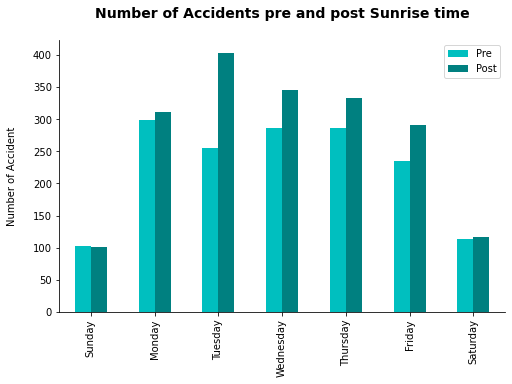

In [65]:
# plot the number of accidents of pre and post sunrise times 
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_sr = pd.DataFrame({'Pre': df_sr_pre,
                    'Post': df_sr_post}).reindex(days)
df_sr.plot(kind='bar', color=['c', 'teal'], figsize=(8,5))
plt.xlabel(''), plt.ylabel('Number of Accident\n')
plt.title("Number of Accidents pre and post Sunrise time\n", fontweight='bold', fontsize = 14)
sns.despine()

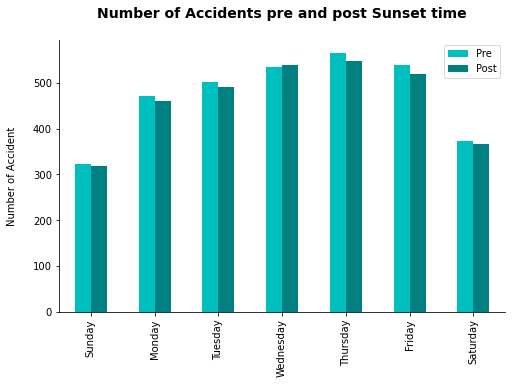

In [66]:
# plot the number of accidents of pre and post sunset times 
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_ss = pd.DataFrame({'Pre': df_ss_pre,
                    'Post': df_ss_post}).reindex(days)
df_ss.plot(kind='bar', color=['c', 'teal'], figsize=(8,5))
plt.xlabel(''), plt.ylabel('Number of Accident\n')
plt.title("Number of Accidents pre and post Sunset time\n", fontweight='bold', fontsize = 14)
sns.despine()

## Vechicles

In [67]:
# number of vehicles involved in an accident
df_accidents_assigned.groupby('Number_of_Vehicles')['Accident_Index'].count()

Number_of_Vehicles
1     34168
2     71898
3      8684
4      2034
5       488
6       158
7        59
8        29
9         9
10        2
11        1
12        1
13        2
14        1
15        1
17        1
Name: Accident_Index, dtype: int64

From the table above, the distribution of vehicles involved in an accidents is rightly skewed which shows that there is a signifcant number collisions among 2 or 3 vehicles. As part of my feature engineering, I will deploy an IQR test to determine the capping value. 

In [68]:
# determine the number of vehicle types involved in an accident
p = df_vehicles_assigned[['Vehicle_Type', 'Accident_Index']].groupby(['Vehicle_Type'], as_index=True).agg({"Accident_Index": "count" }).rename(columns={'Accident_Index':'Num of Accidents'}).sort_values(by=['Num of Accidents'], ascending=False)
p = p.assign(Percentage = lambda x: (x['Num of Accidents'] / x['Num of Accidents'].sum() * 100))
print(p)

                                       Num of Accidents  Percentage
Vehicle_Type                                                       
Car                                              152686     70.5635
Pedal cycle                                       17437      8.0585
Van / Goods 3.5 tonnes mgw or under               12579      5.8134
Motorcycle 125cc and under                         8053      3.7217
Motorcycle over 500cc                              5228      2.4161
Taxi/Private hire car                              4696      2.1702
Bus or coach (17 or more pass seats)               3902      1.8033
Goods 7.5 tonnes mgw and over                      3357      1.5514
Motorcycle over 125cc and up to 500cc              2119      0.9793
Motorcycle 50cc and under                          1489      0.6881
Other vehicle                                      1005      0.4645
Goods over 3.5t. and under 7.5t                     982      0.4538
Goods vehicle - unknown weight                  

There are more car involved in an accidents, however, there are quite a lot of variation. Feature engineering will be carried out to categorised the vehicle type into closely related names.

In [69]:
# describe the age of all vehicles
print(df_vehicles_assigned[ ['Age_of_Vehicle', 'Engine_Capacity_(CC)' , 'Age_of_Driver' ]].describe())

       Age_of_Vehicle  Engine_Capacity_(CC)  Age_of_Driver
count     216381.0000           216381.0000    216381.0000
mean           5.5973             1378.9496        35.0947
std            6.2026             1593.4636        21.0027
min           -1.0000               -1.0000        -1.0000
25%           -1.0000               -1.0000        23.0000
50%            4.0000             1390.0000        35.0000
75%           10.0000             1910.0000        50.0000
max           94.0000            29980.0000       102.0000


There appears to be a need for feature engineering for vehicle age due to an outlier 94 years old. The engine capacity will also be feature engineered as the maximum engine capacity is very high - the engine capacity into three groups of small, medium and large engine.

## Particular Conditions

In [70]:
# to extract data
def get_table(condition):
        
    # build a table showing the proportion of accident severity per condition
    p = df_acc_veh.groupby([condition, 'Accident_Severity']).size().unstack('Accident_Severity')
    p['Count'] = p.sum(axis=1)
    p = p.sort_values("Count", ascending = False)
    p = p.join(p.div(p['Count'], axis=0), rsuffix=' in %')
    q = p.drop(columns=['Fatal', 'Serious', 'Slight', 'Count in %'], axis=1)

    # data for chart
    p = p.drop(columns=['Fatal', 'Serious', 'Slight', 'Count', 'Count in %'], axis=1)

    return p, q


# to plot stacked horizontal barchart
def stacked_chart(data, title, xlabel='\nPercent per Accident Severity', ylabel=''):
        
    # prepare plot
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(left=True, bottom=True)

    # plot
    data.plot(kind='barh', ax=ax, stacked=True, cmap='rainbow')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.legend(bbox_to_anchor=(1, 0.98), frameon=False)

### Road Surface and Weather

In [71]:
# build a table showing the proportion of accident per road surface
print(get_table('Road Surface')[1])

Accident_Severity                  Count  Fatal in %  Serious in %  \
Road Surface                                                         
Dry                          152972.0000      0.0135        0.1871   
Wet or damp                   58426.0000      0.0147        0.1937   
Data missing or out of range   2279.0000         nan        0.0750   
Frost or ice                   2007.0000      0.0149        0.2033   
Snow                            435.0000      0.0138        0.1586   
Flood over 3cm. deep            262.0000      0.0153        0.1870   

Accident_Severity             Slight in %  
Road Surface                               
Dry                                0.7993  
Wet or damp                        0.7916  
Data missing or out of range       0.9250  
Frost or ice                       0.7818  
Snow                               0.8276  
Flood over 3cm. deep               0.7977  


Dry roads have the highest number of accidents, which suggests that the road surface wasn't negatively impacting the cause of accidents. However, a flood road surface has the highest fatality and it is followed by a wet or damp road surface.

In [72]:
# build a table showing the proportion of accident per road surface
print(get_table('Weather')[1])

Accident_Severity           Count  Fatal in %  Serious in %  Slight in %
Weather                                                                 
Fine no high winds    171370.0000      0.0142        0.1919       0.7939
Raining no high winds  27461.0000      0.0112        0.1811       0.8078
Unknown                 5985.0000      0.0074        0.1246       0.8680
Other                   5487.0000      0.0071        0.1440       0.8489
Raining + high winds    2438.0000      0.0205        0.2129       0.7666
Fine + high winds       2253.0000      0.0231        0.2126       0.7643
Fog or mist              679.0000      0.0501        0.1959       0.7541
Snowing no high winds    641.0000      0.0172        0.1544       0.8284
Snowing + high winds      67.0000         nan        0.1194       0.8806


As expected the fatality experienced under a raining or high winds weather is high compared to other, it shows that there is a high possibility of an accident under this weather condition to lead to a fatality case than under other weather condition.

In [73]:
# show the relationship between weather and road surface
df_accidents_assigned.groupby(['Weather', 'Road Surface'])[[
    'Accident_Index']].count().rename(columns={'Accident_Index':'Number of Accident'}).sort_values(by='Number of Accident', ascending = False).head(10)

Number of Accident
Weather               Road Surface                                    
Fine no high winds    Dry                                        77791
Raining no high winds Wet or damp                                14765
Fine no high winds    Wet or damp                                13476
Unknown               Dry                                         2018
Raining + high winds  Wet or damp                                 1372
Other                 Wet or damp                                 1365
                      Dry                                         1327
Unknown               Data missing or out of range                 948
Fine + high winds     Dry                                          761
Fine no high winds    Frost or ice                                 713

From the above, we can see that some conditions are suspicious like snowing and raining weather conditions have 'Dry' road surface.
A clustering analysis has been deployed to further understand the relationship between some of the conditions causing accidents.

Text(0.5, 1.0, 'Elbow Chart')

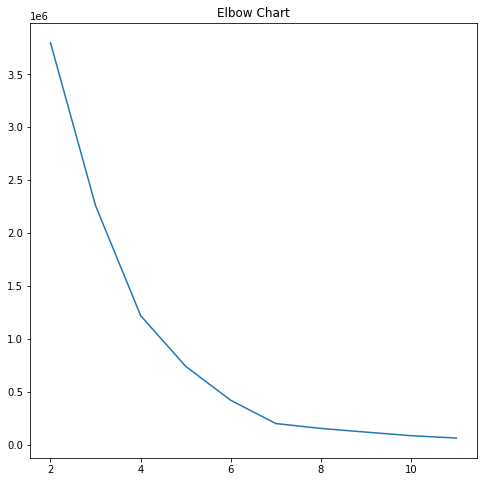

In [74]:
# extract features for clustering
features = ['Speed_limit', 'Weather']
df_ws = df_accidents[features]

# determine the n_cluster by plotting the elbow chart
clusters = range(2,12)
clusters_list = list()

for i in clusters:
    km = KMeans(n_clusters=i, random_state=0).fit(df_ws)
    x = km.inertia_
    clusters_list.append(x)

plt.figure(figsize=(8, 8))
plt.plot(clusters, clusters_list)
plt.title('Elbow Chart')

4 cluster inertia is 1219117.1302784572


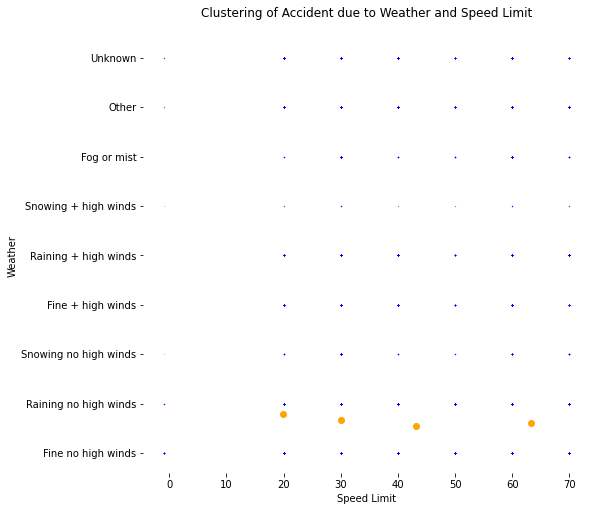

In [75]:
km = KMeans(n_clusters = 4)
km.fit(df_ws)
labels = km.fit_predict(df_ws) # or km.fit_predict
centroids = km.cluster_centers_
print( '4 cluster inertia is ' + str(km.inertia_))

fig = plt.figure(figsize=(8,8))

plt.scatter(y=df_ws['Weather'], x=df_ws['Speed_limit'], color='blue', s= 0.02, alpha = 0.6)
plt.title("Clustering of Accident due to Weather and Speed Limit\n")
plt.yticks([1,2,3,4,5,6,7,8,9], labels = ['Fine no high winds', 'Raining no high winds', 
       'Snowing no high winds', 'Fine + high winds', 'Raining + high winds', 'Snowing + high winds',
       'Fog or mist', 'Other', 'Unknown'])
plt.ylabel("Weather")
plt.xlabel("Speed Limit")

plt.scatter(centroids[:,0], centroids[:,1], color='orange')
sns.despine(left=True, bottom=True)

In [76]:
df_accidents_assigned.groupby(['Weather', 'Speed_limit'])[[
    'Accident_Index']].count().rename(columns={'Accident_Index':'Number of Accident'}).sort_values(by='Number of Accident', ascending = False).head(10)

Number of Accident
Weather               Speed_limit                    
Fine no high winds    30 MPH                    54682
                      60 MPH                    11226
                      20 MPH                     9158
Raining no high winds 30 MPH                     8741
Fine no high winds    40 MPH                     7990
                      70 MPH                     5448
                      50 MPH                     3756
Unknown               30 MPH                     2401
Raining no high winds 60 MPH                     2028
Other                 30 MPH                     1780

### Geographic Location

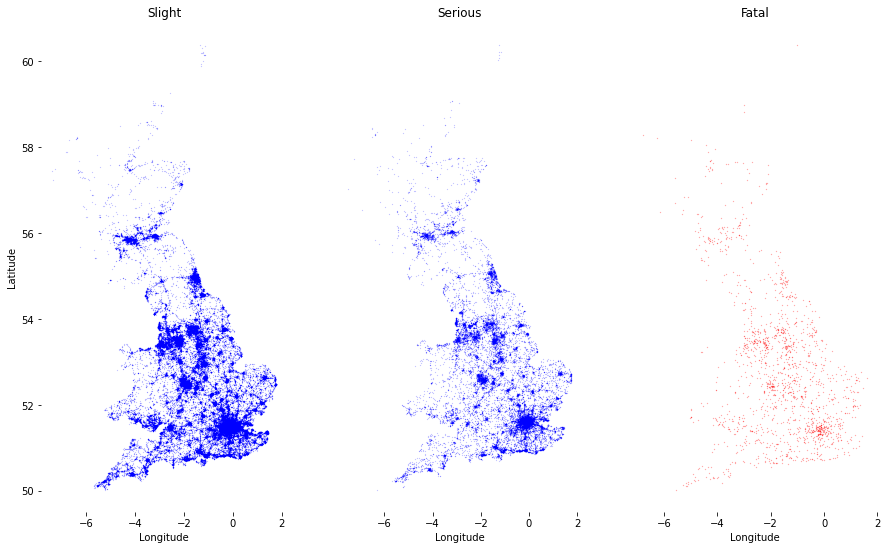

In [77]:
df_slight = df_accidents_assigned[df_accidents_assigned['Accident_Severity'] == 'Slight']
df_serious = df_accidents_assigned[df_accidents_assigned['Accident_Severity'] == 'Serious']
df_fatal = df_accidents_assigned[df_accidents_assigned['Accident_Severity'] == 'Fatal']

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,9))

# plot of slight accident in the UK
df_slight.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='blue', s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Slight")
ax1.set_facecolor('white')

# plot of serious accident in the UK
df_serious.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='blue', s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Serious")
ax2.set(ylabel='')
ax2.set_yticks([])
ax2.set_facecolor('white')

# plot of fatal accident in the UK
df_fatal.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='red', s=.05, alpha=.6, subplots=True, ax=ax3)
ax3.set_title("Fatal")
ax3.set(ylabel='')
ax3.set_yticks([])
ax3.set_facecolor('white')

# remove borderline
sns.despine(left=True, bottom=True)


The map of the country is shown above based on the accident severity. It shows that there is a concentration of accidents in London, Birmingham, Leeds, Liverpool, Manchester, Cardiff, Edinburgh and Glasgow. London appears to be the city with more accidents as there are highly concentrated in the three maps.

### Geographic clustering

Text(0.5, 1.0, 'Elbow Chart')

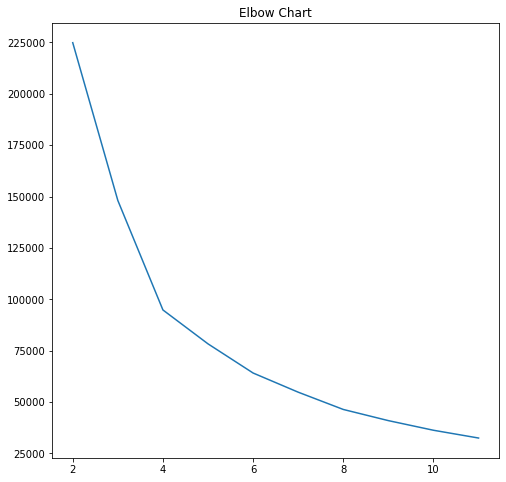

In [78]:
# extract features for clustering
features = ['Longitude' , 'Latitude']
df_geo = df_accidents[features]

# determine the n_cluster by plotting the elbow chart
clusters = range(2,12)
xy = list()

for i in clusters:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_geo)
    x = km.inertia_
    xy.append(x)

plt.figure(figsize=(8, 8))
plt.plot(clusters, xy)
plt.title('Elbow Chart')

4 cluster inertia is 94814.20701486756


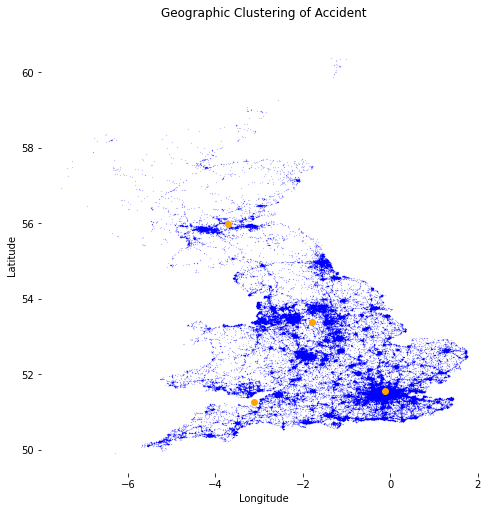

In [79]:
km = KMeans(n_clusters = 4)
km.fit(df_geo)
labels = km.fit_predict(df_geo) # or km.fit_predict
centroids = km.cluster_centers_
print( '4 cluster inertia is ' + str(km.inertia_))

fig = plt.figure(figsize=(8,8))

plt.scatter(df_geo['Longitude'], df_geo['Latitude'], color='blue', s= 0.02, alpha = 0.6)
plt.title("Geographic Clustering of Accident\n")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(centroids[:,0], centroids[:,1], color='orange')
sns.despine(left=True, bottom=True)

The clustering above confirms that there is high concentration of accidents happening in these set of regions.

### Urban and Rural 

Accident_Severity       Count  Fatal in %  Serious in %  Slight in %
Urban Rural                                                         
Urban             144285.0000      0.0072        0.1670       0.8258
Rural              72042.0000      0.0268        0.2294       0.7437
Unallocated           54.0000         nan        0.1111       0.8889


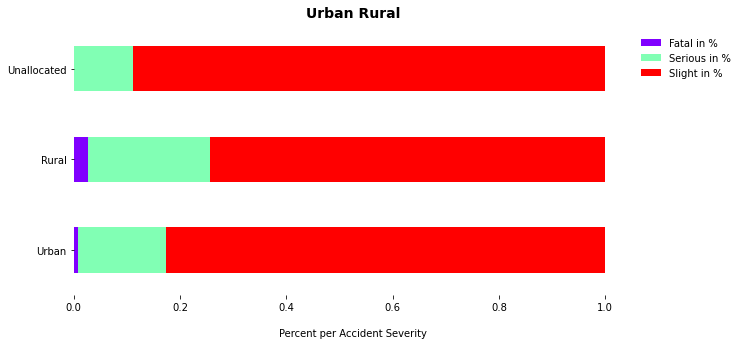

In [80]:
# build a table showing the proportion of accident severity per urban and rural
print(get_table('Urban Rural')[1])

# plot chart 
stacked_chart(get_table('Urban Rural')[0], 'Urban Rural')

The table shows that there is a high chance of an accidents being fatal in rural areas than in urban areas. However, urban areas account for the most slight accidents.

### Point of Impact

Accident_Severity              Count  Fatal in %  Serious in %  Slight in %
1st_Point_of_Impact                                                        
Front                         107437      0.0169        0.2067       0.7763
Back                           36663      0.0071        0.1204       0.8725
Offside                        28566      0.0130        0.2042       0.7829
Nearside                       25293      0.0115        0.1987       0.7898
Did not impact                 11741      0.0192        0.2285       0.7523
Data missing or out of range    6681      0.0001        0.0709       0.9289


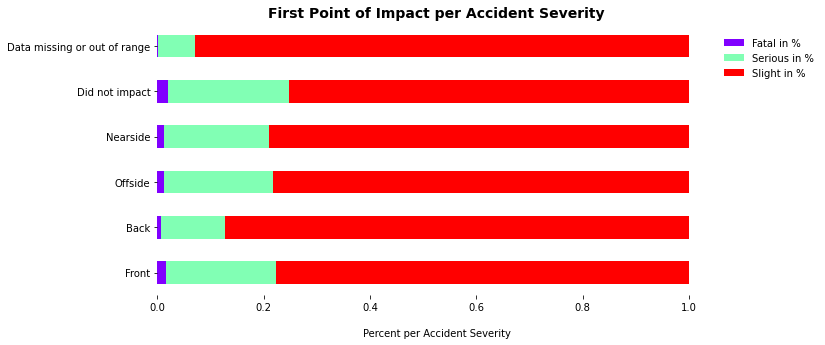

In [81]:
# build a table showing the proportion of accident severity per point of impact
print(get_table('1st_Point_of_Impact')[1])

# plot chart 
stacked_chart(get_table('1st_Point_of_Impact')[0], 'First Point of Impact per Accident Severity')

From the table above, aspected front collisions appear to be the highest point of impact for any accident per accident severity. It is followed by number of people seating at the back of the vehicle. The ratio of the front to back collision shows that it is safer to sit at the back.

### Vehicle Manoeurve


Accident_Severity              Count  Fatal in %  Serious in %  Slight in %
Vehicle_Manoeuvre                                                          
Going ahead other             102086      0.0176        0.2063       0.7761
Turning right                  19208      0.0089        0.2155       0.7757
Slowing or stopping            13696      0.0056        0.1268       0.8676
Data missing or out of range   13063      0.0002        0.0546       0.9453
Waiting to go - held up        10738      0.0038        0.0901       0.9061


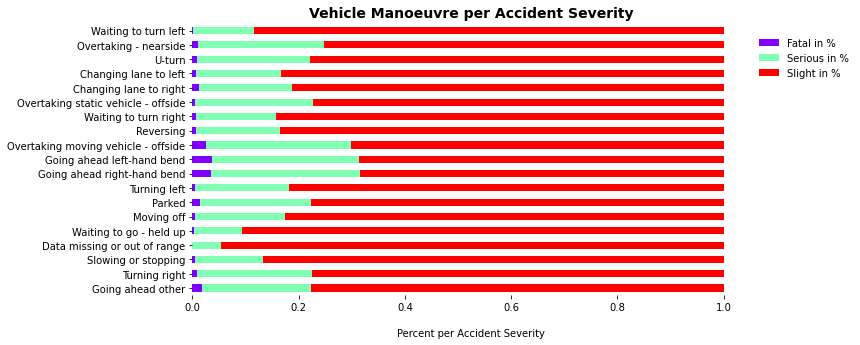

In [82]:
# build a table showing the proportion of accident severity per vehicle manoeurve
print(get_table('Vehicle_Manoeuvre')[1].head())

# plot chart 
stacked_chart(get_table('Vehicle_Manoeuvre')[0], 'Vehicle Manoeuvre per Accident Severity')

The table above shows that going ahead of others is a dangerous vehicle manoeurves - it accounts for a significant number of accidents along with a high fatality rate.

### Junction Detail

Accident_Severity                        Count  Fatal in %  Serious in %  \
Junction_Detail                                                            
Not at junction or within 20 metres 88753.0000      0.0209        0.2077   
T or staggered junction             62119.0000      0.0103        0.1886   
Crossroads                          21381.0000      0.0087        0.1716   
Roundabout                          17392.0000      0.0037        0.1322   
Other junction                      10196.0000      0.0105        0.1981   
Private drive or entrance            5239.0000      0.0103        0.1893   
Mini-roundabout                      3104.0000      0.0019        0.1363   
Slip road                            3068.0000      0.0127        0.1405   
More than 4 arms (not roundabout)    2666.0000      0.0041        0.2003   
Data missing or out of range         2463.0000         nan        0.0467   

Accident_Severity                    Slight in %  
Junction_Detail                     

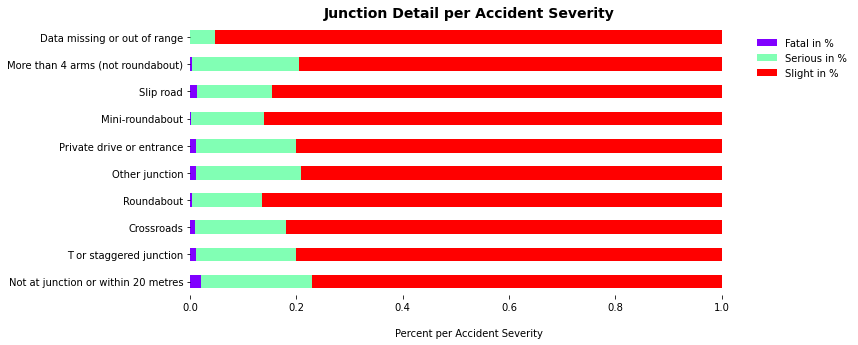

In [83]:
# build a table showing the proportion of accident severity per junction detail
print(get_table('Junction_Detail')[1])

# plot chart 
stacked_chart(get_table('Junction_Detail')[0], 'Junction Detail per Accident Severity')

In most cases, accidents happen at T or staggered junction and crossroads whilst all roundabouts account for a significant number of slight accidents. Most fatal accidents did not happen at junctions or within 20 metres of any junctions. 

### Road Type

Accident_Severity    Count  Fatal in %  Serious in %  Slight in %
Road_Type                                                        
Single carriageway  154114      0.0145        0.2024       0.7831
Dual carriageway     37391      0.0167        0.1696       0.8137
Roundabout           13043      0.0028        0.1323       0.8650
One way street        4478      0.0040        0.1376       0.8584
Slip road             3748      0.0128        0.1286       0.8586
Unknown               3607      0.0036        0.0757       0.9207


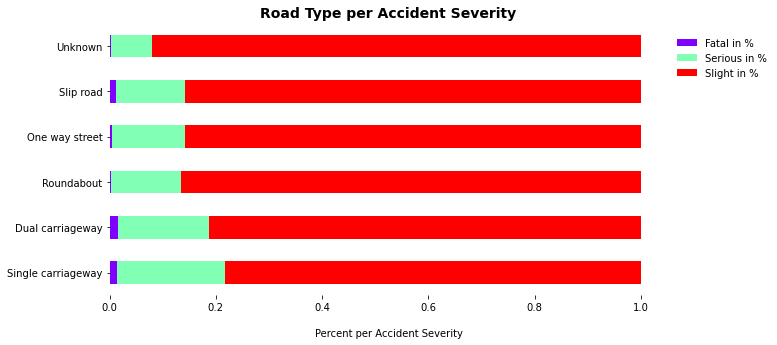

In [84]:
# build a table showing the proportion of accident severity per road type
print(get_table('Road_Type')[1])

# plot chart 
stacked_chart(get_table('Road_Type')[0], 'Road Type per Accident Severity')

The above table shows that most accidents happened in single carriageway, as expected due to the structure of the road. Surprisingly the least cause of accident is the slip road. It also shows that accidents in roundabouts are not as fatal as the other type of road, however, it has the highest proportion for slight accidents. The dual carriageway appears to be the one with a high proportion of fatal accidents. It is important that the government design more of dual carriageway accident than the single carriageway. Dual carriageway might be expensive in terms of construction but the number of accidents will reduce.

### Light Conditions

Accident_Severity                  Count  Fatal in %  Serious in %  \
Light_Conditions                                                     
Daylight                     155834.0000      0.0118        0.1822   
Darkness - lights lit         44287.0000      0.0126        0.1947   
Darkness - no lighting        10014.0000      0.0487        0.2748   
Darkness - lighting unknown    4688.0000      0.0109        0.1214   
Darkness - lights unlit        1557.0000      0.0193        0.1985   
Data missing or out of range      1.0000         nan           nan   

Accident_Severity             Slight in %  
Light_Conditions                           
Daylight                           0.8060  
Darkness - lights lit              0.7927  
Darkness - no lighting             0.6765  
Darkness - lighting unknown        0.8677  
Darkness - lights unlit            0.7823  
Data missing or out of range       1.0000  


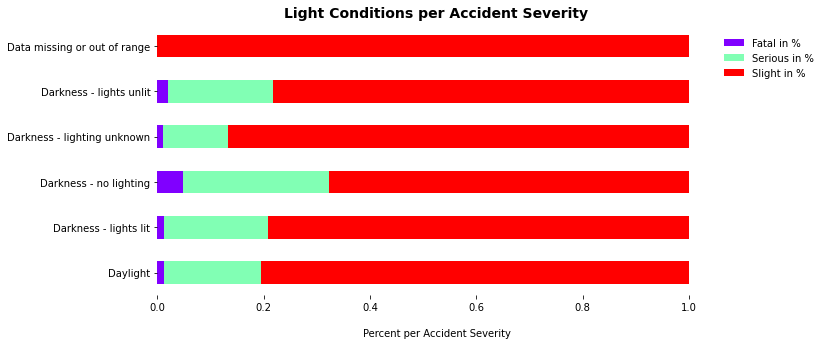

In [85]:
# build a table showing the proportion of accident severity per light conditions
print(get_table('Light_Conditions')[1])

# plot chart 
stacked_chart(get_table('Light_Conditions')[0], 'Light Conditions per Accident Severity')

The table shows that majority of the accidents occured during the day. It is worth noting that there is more fatal cases during darkness conditions without street lights.

### Pedestrian Cross Physical

Accident_Severity                                        Count  Fatal in %  \
Ped Cross - Physical                                                         
No physical crossing facilities within 50 metres   168980.0000      0.0157   
Pedestrian phase at traffic signal junction         17082.0000      0.0054   
Pelican, puffin, toucan or similar non-junction...  11144.0000      0.0090   
Zebra                                                7836.0000      0.0045   
Data missing or out of range                         5738.0000         nan   
Central refuge                                       5110.0000      0.0160   
Footbridge or subway                                  491.0000      0.0244   

Accident_Severity                                   Serious in %  Slight in %  
Ped Cross - Physical                                                           
No physical crossing facilities within 50 metres          0.1973       0.7871  
Pedestrian phase at traffic signal junction              

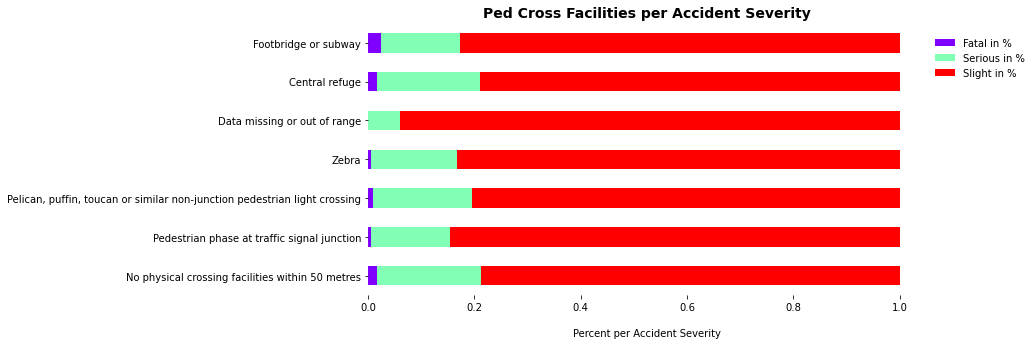

In [86]:
# build a table showing the proportion of accident severity per ped cross physical
print(get_table('Ped Cross - Physical')[1])

# plot chart 
stacked_chart(get_table('Ped Cross - Physical')[0], 'Ped Cross Facilities per Accident Severity')

We can see that most accidents happened where there is no physical crossing facilities within 50 metres. Hence, there is a positively that pedestrians are more affected by this.

#### Specifics Conditions

In [167]:
# show the relationship between these conditions
df_accidents_assigned.groupby(['Weather', 'Road Surface', 'Speed_limit', 'Light_Conditions', 'Ped Cross - Physical', 'Road_Type'])[[
    'Accident_Index']].count().rename(columns={'Accident_Index':'Number of Accident'}).sort_values(by='Number of Accident', ascending = False)

Number of Accident
Weather            Road Surface Speed_limit Light_Conditions      Ped Cross - Physical                             Road_Type                             
Fine no high winds Dry          30 MPH      Daylight              No physical crossing facilities within 50 metres Single carriageway               22550
                                60 MPH      Daylight              No physical crossing facilities within 50 metres Single carriageway                6054
                                30 MPH      Darkness - lights lit No physical crossing facilities within 50 metres Single carriageway                4941
                                20 MPH      Daylight              No physical crossing facilities within 50 metres Single carriageway                2991
                                70 MPH      Daylight              No physical crossing facilities within 50 metres Dual carriageway                  2958
...                                                                                                                                                   ...
Other              Frost or ice 40 MPH      Daylight              Pedestrian phase at traffic signal junction      Dual carriageway                     1
                                                                  No physical crossing facilities within 50 metres Dual carriageway                     1
                                30 MPH      Daylight              Zebra                                            Single carriageway                   1
                                                                  Pedestrian phase at traffic signal junction      Unknown                              1
Unknown            Wet or damp  70 MPH      Daylight              No physical crossing facilities within 50 metres Unknown                              1

[3341 rows x 1 columns]

## Driver Related Variables

### Sex of Driver

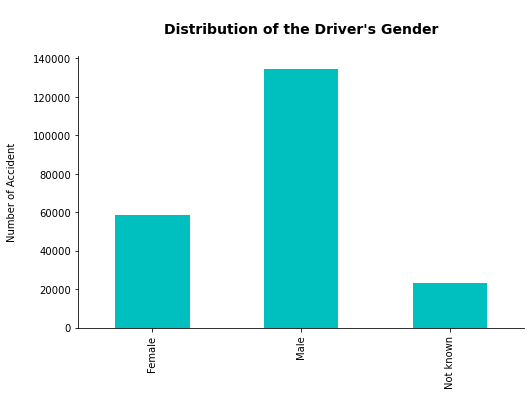

In [88]:
# get data
df_sex = df_acc_veh[ df_acc_veh.Sex_of_Driver != 'Data missing or out of range']

# plot barchart
df_sex.groupby('Sex_of_Driver').size().plot(kind='bar', color='c', 
                                                              figsize=(8,5), grid=False)
plt.xlabel(''), plt.ylabel('Number of Accident\n')
plt.title("\nDistribution of the Driver's Gender\n", fontweight='bold', fontsize = 14)
sns.despine()

The sex of driver involved in accident is skewed towards the male gender which suggests that a male driver is reckless than their counterparts.

### Driver's Age

[Text(0.5, 0, 'Hour of the Day'), Text(0, 0.5, 'Age of Driver')]

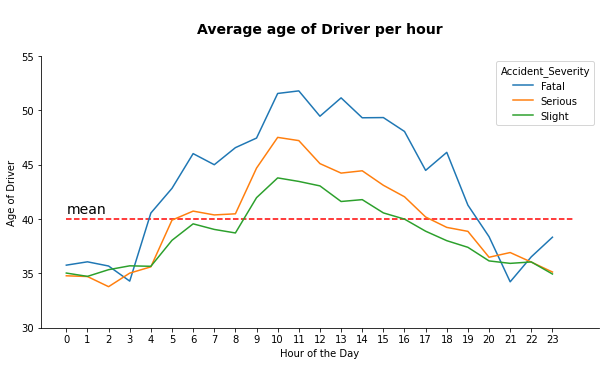

In [89]:
# to help with analysis - I have replaced all -1 with the median value
df_acc_veh['Age_of_Driver'].replace(-1, df_acc_veh['Age_of_Driver'].median(), inplace=True)

# prepare plot
fig, ax = plt.subplots(figsize=(10,5))
sns.despine()

df_acc_veh.groupby(['hour', 'Accident_Severity'])\
    ['Age_of_Driver'].mean().unstack().plot(xticks=range(24), ylim=[30,55], ax=ax)

# Adding a horizontal line for mean age
plt.hlines(y=df_acc_veh['Age_of_Driver'].mean(), 
           xmin=0, xmax=24, 
           color="r", linestyle="--")
plt.text(0, 40.5, str("mean"), fontsize=14)

ax.set_title('\nAverage age of Driver per hour\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Age of Driver')

### Purpose of Journey

Accident_Severity              Count  Fatal in %  Serious in %  Slight in %
Journey Purpose                                                            
Not known                     128259      0.0130        0.1723       0.8148
Journey as part of work        30692      0.0189        0.1895       0.7916
Other                          29807      0.0172        0.2457       0.7371
Commuting to/from work         24390      0.0083        0.2006       0.7911
Taking pupil to/from school     2356      0.0017        0.1562       0.8421
Pupil riding to/from school      819      0.0061        0.1575       0.8364
Data missing or out of range      58      0.0345        0.2414       0.7241


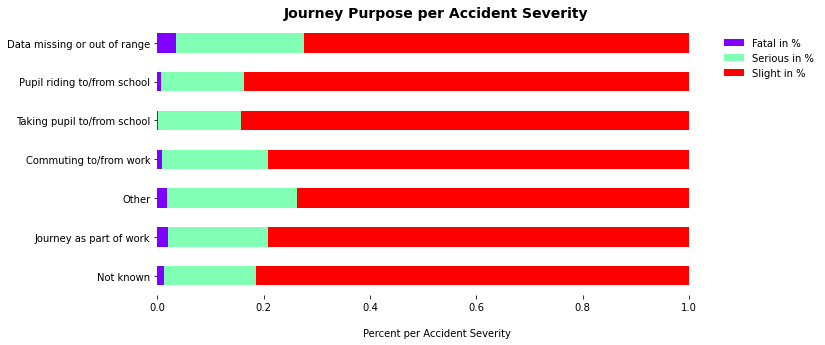

In [90]:
# build a table showing the proportion of accident severity per purpose of journey
print(get_table('Journey Purpose')[1])

# plot chart 
stacked_chart(get_table('Journey Purpose')[0], 'Journey Purpose per Accident Severity')

### Speed Limit

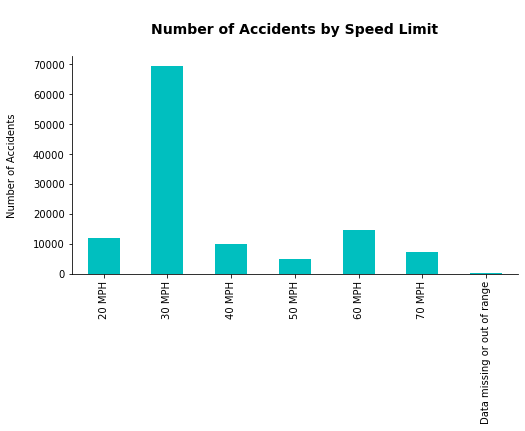

In [91]:
# check speed limit
df_accidents_assigned.groupby('Speed_limit')['Accident_Index'].count().plot(kind='bar', color='c', 
                                                              figsize=(8,4), grid=False)
plt.xlabel(''), plt.ylabel('Number of Accidents\n')
plt.title('\nNumber of Accidents by Speed Limit\n', fontweight='bold', fontsize = 14)
sns.despine()

The chart shows that surprisingly most road accidents occur when the speed limit zone is 30 mph. Most drivers could have been distracted with commons things like texting while driving or probably drunk driving.

# Feature Engineering II

In [92]:
def outlier_range(values):
    cut_off = 1.5
    q75, q25 = np.percentile(values, [75, 25])
    iqr = q75 - q25
    lower, upper = q25 - cut_off*iqr, q75 + cut_off*iqr
    # identify outliers
    outliers = [x for x in values if x < lower or x > upper]
    print('Number of outliers observation: %d' % len(outliers))
    non_outliers = [x for x in values if x >= lower and x <= upper]
    print('Number of non-outlier observations: %d' % len(non_outliers))
    return (lower, upper)

In [93]:
# determine outlier and capping point for number of vehicles
outlier_range(df['Number_of_Vehicles'])

Number of outliers observation: 5456
Number of non-outlier observations: 147702


(-0.5, 3.5)

In [94]:
# determine outlier and capping point for age of vehicles
outlier_range(df['Age_of_Vehicle'])

Number of outliers observation: 335
Number of non-outlier observations: 152823


(-19.0, 29.0)

In [95]:
# determine outlier
outlier_range(df['Engine_Capacity_(CC)'])

Number of outliers observation: 4006
Number of non-outlier observations: 149152


(-2425.5, 4330.5)

In [96]:
# carry out some transformation on the data to reduce noise in the model
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].apply(lambda x: 4 if x > 3 else x)
df['Age_of_Vehicle'] = df['Age_of_Vehicle'].apply(lambda x: 29 if x > 28 else x)

# group similar vehicle type
df['Vehicle_Type'] = df['Vehicle_Type'].apply(lambda x: 1 if x == 1 else x) # pedal cycle
df['Vehicle_Type'] = df['Vehicle_Type'].apply(lambda x: 2 if x in [2,3,4,5,23,97] else x) # motorcycles
df['Vehicle_Type'] = df['Vehicle_Type'].apply(lambda x: 3 if x in [8,9] else x) # car
df['Vehicle_Type'] = df['Vehicle_Type'].apply(lambda x: 4 if x in [10,11] else x) # bus
df['Vehicle_Type'] = df['Vehicle_Type'].apply(lambda x: 5 if x in [19,20,21,98] else x) # good vehicles
df['Vehicle_Type'] = df['Vehicle_Type'].apply(lambda x: 6 if x in [16,17,18,22,90] else x) # other vehicles 

# group similar casualty type
df['Casualty_Type'] = df['Casualty_Type'].apply(lambda x: 1 if x == 1 else x) # cyclists
df['Casualty_Type'] = df['Casualty_Type'].apply(lambda x: 2 if x in [2,3,4,5,23,97] else x) # motorcyclists
df['Casualty_Type'] = df['Casualty_Type'].apply(lambda x: 3 if x in [8,9] else x) # car occupants
df['Casualty_Type'] = df['Casualty_Type'].apply(lambda x: 4 if x in [10,11] else x) # bus occupants
df['Casualty_Type'] = df['Casualty_Type'].apply(lambda x: 5 if x in [19,20,21,98] else x) # good vehicle occupants
df['Casualty_Type'] = df['Casualty_Type'].apply(lambda x: 6 if x in [16,17,18,22,90] else x) # other occupants

# group the engine capacity
''' 0:moderately-small engine, 1:small engine, 2:medium engine, 3:moderately-large engine and 4:large engine'''
df['Engine_Capacity_(CC)'] = df['Engine_Capacity_(CC)'].apply(lambda x: 0 if (x > 0 and x < 1000) else x)
df['Engine_Capacity_(CC)'] = df['Engine_Capacity_(CC)'].apply(lambda x: 1 if (x >= 1000  and x < 1500) else x)
df['Engine_Capacity_(CC)'] = df['Engine_Capacity_(CC)'].apply(lambda x: 2 if (x >= 1500 and x < 2000) else x)
df['Engine_Capacity_(CC)'] = df['Engine_Capacity_(CC)'].apply(lambda x: 3 if (x >= 2000 and x < 2500) else x)
df['Engine_Capacity_(CC)'] = df['Engine_Capacity_(CC)'].apply(lambda x: 4 if x >= 2500 else x)

In [97]:
# to plot bar chart without labels
def plot_count(data, title, xlabel='', ylabel=''):
    
    # prepare plot
    fig, ax = plt.subplots(figsize=(8,5))
    sns.despine()

    # plot
    sns.countplot(data)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set(xlabel=xlabel, ylabel=ylabel)

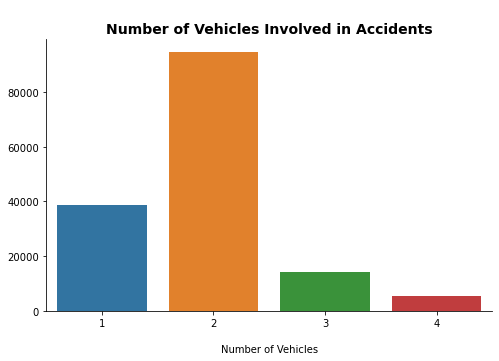

In [98]:
# plot chart for number of vehicles
plot_count(df['Number_of_Vehicles'], '\nNumber of Vehicles Involved in Accidents', '\nNumber of Vehicles')

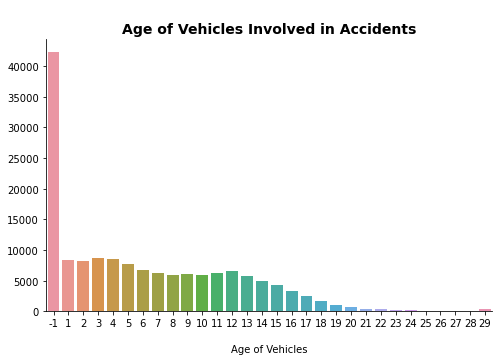

In [99]:
# plot chart for age of vehicles
plot_count(df['Age_of_Vehicle'], '\nAge of Vehicles Involved in Accidents', '\nAge of Vehicles')

In [100]:
# to plot bar chart with labels
def plot_count(data, title, labels, xlabel='', ylabel=''):
    
    # prepare plot
    fig, ax = plt.subplots(figsize=(8,5))
    sns.despine()

    # plot bar chart
    sns.countplot(data)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticklabels(labels = labels, rotation=45)
    ax.set(xlabel=xlabel, ylabel=ylabel)

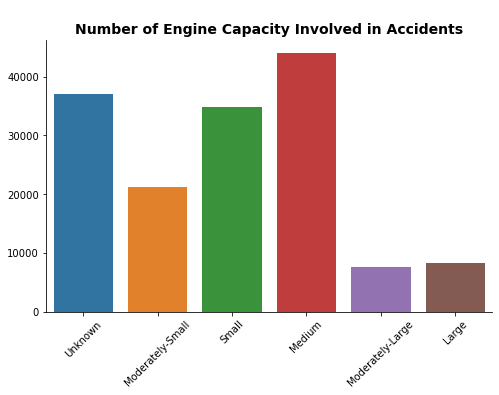

In [101]:
# plot chart for number of engine capacity
engine_label = ['Unknown', 'Moderately-Small', 'Small', 'Medium', 'Moderately-Large', 'Large']
plot_count(df['Engine_Capacity_(CC)'], '\nNumber of Engine Capacity Involved in Accidents', engine_label)

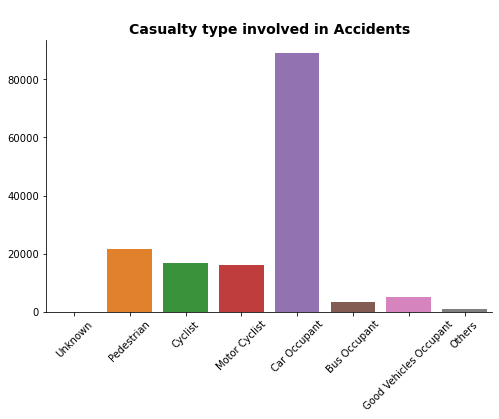

In [102]:
# plot chart for number of casualty type
cas_type = ['Unknown', 'Pedestrian', 'Cyclist', 'Motor Cyclist', 'Car Occupant', 'Bus Occupant', 'Good Vehicles Occupant', 'Others']
plot_count(df['Casualty_Type'], '\nCasualty type involved in Accidents', cas_type)

In [103]:
# determine the number of accidents per casualty type
p = df[['Casualty_Type', 'Accident_Index']].groupby(['Casualty_Type'], as_index=True).agg({"Accident_Index": "count" }).rename(columns={'Accident_Index':'Num of Accidents'}).sort_values(by=['Num of Accidents'], ascending=False)
p = p.assign(Percentage = lambda x: (x['Num of Accidents'] / x['Num of Accidents'].sum() * 100))
print(p)

               Num of Accidents  Percentage
Casualty_Type                              
 3                        89032     58.1308
 0                        21770     14.2141
 1                        16884     11.0239
 2                        16224     10.5930
 5                         4985      3.2548
 4                         3384      2.2095
 6                          874      0.5707
-1                            5      0.0033


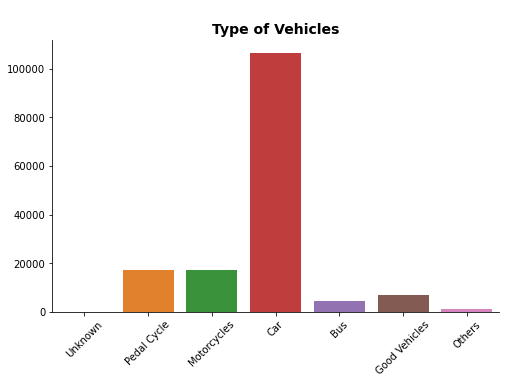

In [104]:
# plot chart for number of vehicle type
veh_type = ['Unknown', 'Pedal Cycle', 'Motorcycles', 'Car', 'Bus', 'Good Vehicles', 'Others']
plot_count(df['Vehicle_Type'], '\nType of Vehicles', veh_type)

In [105]:
# determine the number of accidents per casualty type
p = df[['Vehicle_Type', 'Accident_Index']].groupby(['Vehicle_Type'], as_index=True).agg({"Accident_Index": "count" }).rename(columns={'Accident_Index':'Num of Accidents'}).sort_values(by=['Num of Accidents'], ascending=False)
p = p.assign(Percentage = lambda x: (x['Num of Accidents'] / x['Num of Accidents'].sum() * 100))
print(p)

              Num of Accidents  Percentage
Vehicle_Type                              
 3                      106376     69.4551
 1                       17291     11.2896
 2                       17179     11.2165
 5                        6864      4.4816
 4                        4279      2.7938
 6                        1085      0.7084
-1                          84      0.0548


# Analysis

## Clustering
PCA will be carried out to reduce the dimensionality of our dataset by discovering new features.

PCA technique is particularly useful in processing data where multi-collinearity exists between the features/variables.
PCA can be used when the dimensions of the input features are high (e.g. a lot of variables).
PCA can be also used for denoising and data compression.

In [106]:
# extract features and target for PCA 
feat = ['Speed_limit', 'Road Surface', 'Weather', 'Light_Conditions', 'Number_of_Vehicles', 'Longitude',
            'Latitude', 'Urban Rural', 'Road_Type', 'Vehicle_Manoeuvre', 'Junction_Detail']

x = df.loc[:, feat].values

# Standardizing the features
x = StandardScaler().fit_transform(x) # the variables have been standardize

# PCA to keep 80% of explained variance
pca = PCA(0.80)

# components required to keep 80% of variance
principalComponents = pca.fit_transform(x)

# cumulative sum of explained variance by the components
var_cumsum=pca.explained_variance_ratio_.cumsum()
print(var_cumsum)
print('\nNeed to keep {} components to explain 80% of the variance.'.format(len(var_cumsum)))

[0.18401721 0.31282071 0.42800293 0.52230374 0.61158602 0.69979723
 0.77565052 0.84806712]

Need to keep 8 components to explain 80% of the variance.


I have used the explained variance to determine the components, 8 components achieved a cummulative variance ratio of 80%. Hence, I have reduced the dimensionality of the selected features to 8 components without losing important features in the clustering of the severity.
We can see that in the PCA space, the variance is maximized along PC1 to PC8. Together, they explain 84.89%. In this next cell, I have used the k-means to group the observation into different groups of casualty severity. I would have used the elbow to determine the optimal number of clusters, however, in this case, I have used 3 clusters to have the same number as the severity.

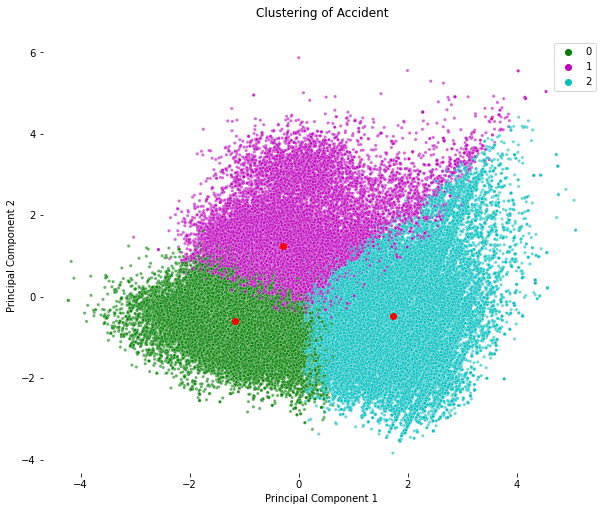

In [107]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = kmeans.fit(principalComponents)
labels = kmeans.predict(principalComponents)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(10,8))

sns.scatterplot(principalComponents[:, 0], principalComponents[:, 1], hue=labels, palette=['g', 'm', 'c'], s = 10, alpha = 0.6)
plt.title("Clustering of Accident\n")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.scatter(centroids[:,0], centroids[:,1], color='red')
sns.despine(left=True, bottom=True)

## Apriori Algorithm
Rules were generated based on the following attributes: Speed Limit, Weather Conditions, Urban or Rural Area, Light Conditions, Number of Vehicles, Road Types and Junction Details

In [108]:
# list of attributes 
att = ['Number_of_Vehicles', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Light_Conditions', 'Weather', 
'Road Surface', 'Vehicle_Manoeuvre', 'Junction_Location', '1st_Point_of_Impact', 'Casualty_Severity']

df_att = df_assigned[att]

# transform these attributes
df_apriori = pd.get_dummies(df_att.astype(str))

# build item set
item_set = apriori(df_apriori, min_support=0.1,  use_colnames=True)

# extract the association between the item set
rules = association_rules(item_set, metric='confidence', min_threshold=0.0)
print("There are " + str(len(rules)) + " number of rules")

There are 17394 number of rules


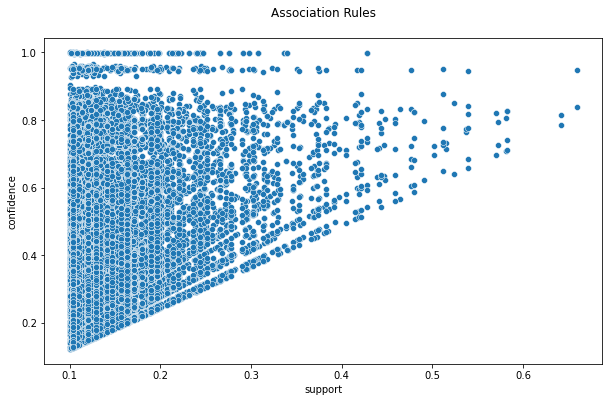

In [109]:
# plot relationship
plt.figure(figsize=(10,6))
plt.title("Association Rules\n")
sns.scatterplot(x=rules.support, y=rules.confidence, data= rules)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

Notice that all optimal rules are located on the support and confidence border. It suggests that increasing the support metric will take out the heavily concentrated portion.

In [110]:
# extract for all severity within the rules
sev = [frozenset({'Casualty_Severity_Serious'}), frozenset({'Casualty_Severity_Slight'}), frozenset({'Casualty_Severity_Fatal'})]
rules_sev = rules[rules.consequents.isin(sev)].reindex()
rules_sev

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Number_of_Vehicles_1),(Casualty_Severity_Slight),0.2540,0.8192,0.1852,0.7291,0.8901,-0.0229,0.6676
52,(Number_of_Vehicles_2),(Casualty_Severity_Slight),0.6162,0.8192,0.5240,0.8503,1.0380,0.0192,1.2078
60,(Road_Type_Dual carriageway),(Casualty_Severity_Slight),0.1712,0.8192,0.1441,0.8421,1.0280,0.0039,1.1450
93,(Road_Type_Single carriageway),(Casualty_Severity_Serious),0.7216,0.1694,0.1321,0.1831,1.0806,0.0099,1.0167
94,(Road_Type_Single carriageway),(Casualty_Severity_Slight),0.7216,0.8192,0.5809,0.8049,0.9826,-0.0103,0.9270
...,...,...,...,...,...,...,...,...,...
16828,"(Light_Conditions_Daylight, Vehicle_Manoeuvre_...",(Casualty_Severity_Slight),0.1558,0.8192,0.1193,0.7659,0.9350,-0.0083,0.7726
16890,"(Light_Conditions_Daylight, Number_of_Vehicles...",(Casualty_Severity_Slight),0.1509,0.8192,0.1297,0.8592,1.0489,0.0060,1.2847
17016,"(Light_Conditions_Daylight, Vehicle_Manoeuvre_...",(Casualty_Severity_Slight),0.1282,0.8192,0.1035,0.8071,0.9853,-0.0015,0.9375
17142,"(Light_Conditions_Daylight, Vehicle_Manoeuvre_...",(Casualty_Severity_Slight),0.1288,0.8192,0.1040,0.8079,0.9862,-0.0015,0.9412


There are 8 number of rules with minimum  metrics; support of 0.4, confidence of 0.8 and lift of 1.0


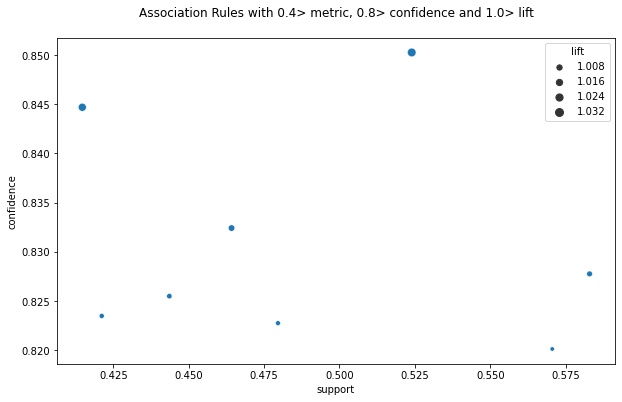

In [111]:
# get data with
rules2 = rules_sev[ (rules_sev.support>0.4) & (rules_sev.confidence>0.8) & (rules_sev.lift>1.0)]
print("There are " + str(len(rules2)) + " number of rules with minimum  metrics; support of 0.4, confidence of 0.8 and lift of 1.0")

# plot relationship
plt.figure(figsize=(10,6))
plt.title("Association Rules with 0.4> metric, 0.8> confidence and 1.0> lift\n")
sns.scatterplot(x=rules2.support, y=rules2.confidence, size='lift', data= rules2)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

Text(68.09374999999997, 0.5, '')

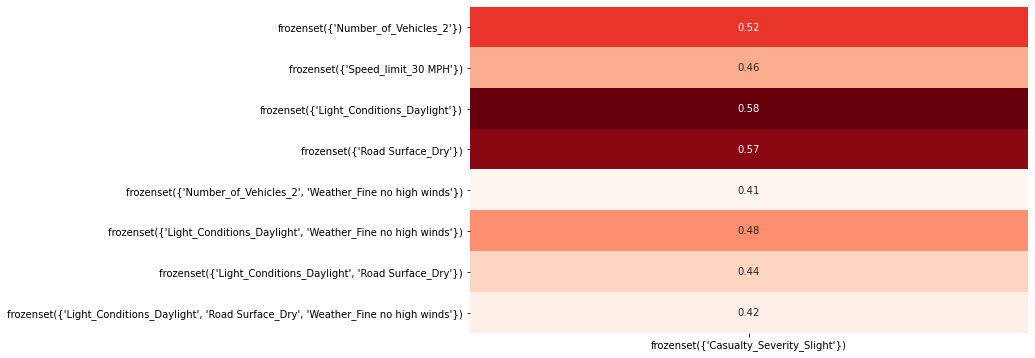

In [112]:
# get data
df_rules = rules2.pivot(index='antecedents', columns ='consequents', values = 'support')

# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_rules, cmap='Reds', annot=True, cbar=False)
plt.xlabel('')
plt.ylabel('')

The heatmap is used to represent the association between the factors leading to accidents. Assuming that the proportion of an accident happening is atleast 40% i.e minimum support of 0.4, minimum confidence of 0.8, we can see there is a high frequency of accidents happening due to factors like light conditions = daylight, road surface = dry, number of vehicles = 2, and so on.

The apriori algorithm shows that these factors are significant factors in the possibility of an accident happening due to its high freqency rules. The ministry of transport will need to educate or create more roadsigns for drivers to be cautious while driving.

## Predict number of accidents

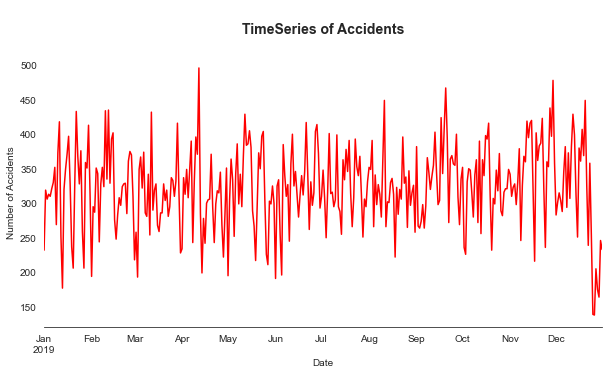

In [113]:
# seasonlity and occurences of accidents
df_date = df_accidents_assigned [ df_accidents_assigned.Date.between('2019-01-01', '2019-12-31')]

# groupby year and severities
p = df_date.groupby('Date')['Accident_Index'].count()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))

# plot
p.plot(color='red', ax=ax)
ax.set_title('\nTimeSeries of Accidents\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Number of Accidents', xlabel='Date')

# remove borderline
sns.despine(top=True, right=True, left=True, bottom=False)

There appears to be some seasonality over the time period.

In [114]:
# deploy an arima time serie model
mod = sm.tsa.statespace.SARIMAX(p,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.aic

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3347      0.055      6.080      0.000       0.227       0.443
ma.L1         -1.0000     24.520     -0.041      0.967     -49.058      47.058
ar.S.L12      -0.4956      0.056     -8.834      0.000      -0.606      -0.386
sigma2      4730.4290   1.16e+05      0.041      0.967   -2.23e+05    2.32e+05


3843.2878452004084

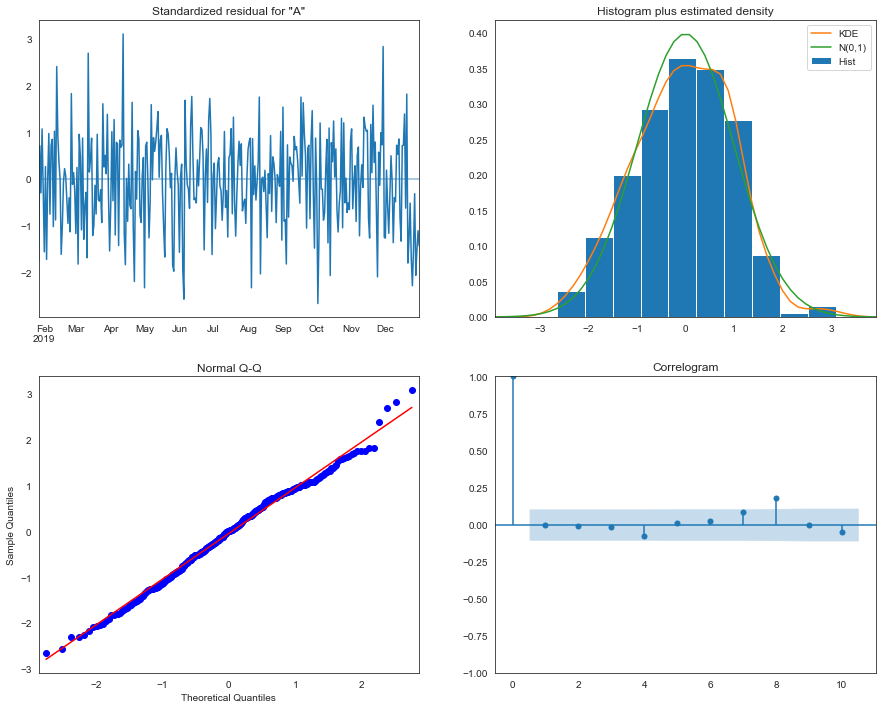

In [115]:
# the plot describe the model
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The qq-plot indicates that the residual of the ordered distribution follows a linear trend of the samples from the standard normal distribution. KDE line in the top right closely follows the N(0,1) line, also indicating that the residuals are normally distributed.

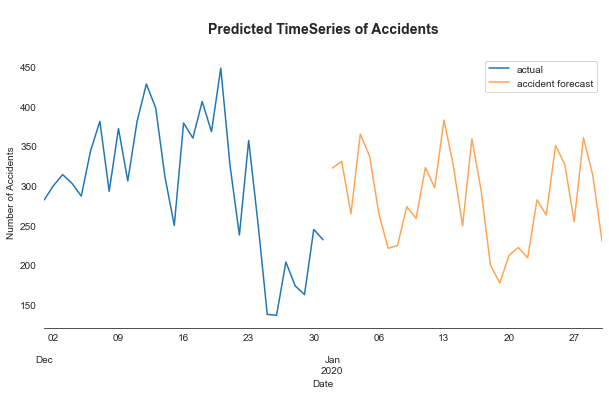

In [116]:
# forecast into jan 2020
pred_uc = results.get_forecast(steps=30)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))

# plot
p['2019-12-01':].plot(label='actual')
pred_uc.predicted_mean.plot(ax=ax, label='accident forecast', alpha=.7)
ax.set_title('\nPredicted TimeSeries of Accidents\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Number of Accidents', xlabel='Date')
plt.legend()

# remove borderline
sns.despine(top=True, right=True, left=True, bottom=False)

# Feature Extraction
In this section, I have made use of univariate selection to determine the important features for the modelling of the casualty severity. It shows the strongest relationship between the features and the target label - the statistical test used is ANOVA f-value as it is suitable for numerical and categorical values. It is worth noting that the statistical test is independent of the choice of the model. In the evaluation section, I will iterate through with the best model.

In [117]:
# extract the non-fatal data for prediction
df_ = df[df.Casualty_Severity != 1]

# transform these attributes
df_dummy = pd.get_dummies(df_[["day_time", "season"]])
df_ = pd.concat([df_,df_dummy], axis=1, sort=False)
len(df_)

151406

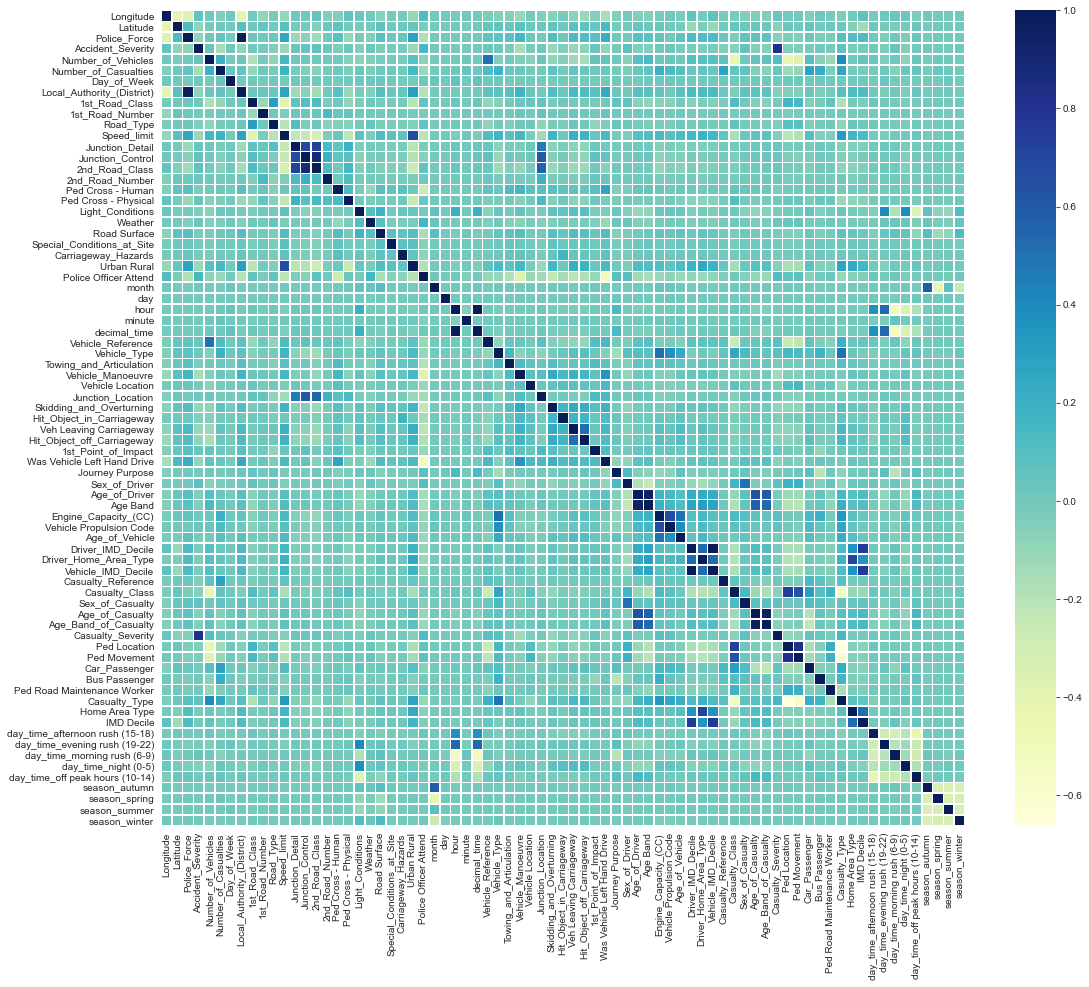

In [118]:
# show the relationship between the variables
corrMatrix = df_.corr()
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.heatmap(corrMatrix, linewidths=0.5, cmap="YlGnBu")

In determing the predictors, I have used the correlation analysis to determine some attributes to eliminate along with redundant attributes or post-accident attributes whilst removing factors that have slight influence on the prediction of the injury severity.

In [119]:
# create a binary variable for casualty severity 
''' 1:Slight and 0:Serious'''
df_['Casualty_Severity'] = df_['Casualty_Severity'].apply(lambda x: 1 if x == 3 else 0)

In [120]:
# extract the input variables and output variable
features =  ['Number_of_Vehicles', 'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 
       'Junction_Control', '2nd_Road_Number', 'Ped Cross - Human', 'Junction_Detail', 'Road_Type', 'Speed_limit',
       'Ped Cross - Physical', 'Light_Conditions', 'Weather', 'Road Surface','Special_Conditions_at_Site',
       'Carriageway_Hazards', 'Urban Rural', 'month', 'day','minute', 'decimal_time', 'Vehicle_Type', 
       'Vehicle_Manoeuvre','Vehicle Location', 'Junction_Location', 'Skidding_and_Overturning',
       '1st_Point_of_Impact', 'Journey Purpose', 'Sex_of_Driver', 'Age_of_Driver', 'Engine_Capacity_(CC)', 'Vehicle Propulsion Code', 
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type']

xx  = df_[features]
y =  df_['Casualty_Severity']

In [121]:
# feature selection with f1 score
selector = SelectKBest(score_func=f_classif, k=20)
selector = selector.fit(xx, y)
predictors = xx.columns[selector.get_support()]

# extract the input variables and output variable
x  = df_[predictors]
y =  df_['Casualty_Severity']

# split the imbalanced data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42, stratify=y)

In [122]:
# show the predictors 
predictors

Index(['Number_of_Vehicles', '1st_Road_Class', 'Junction_Control',
       '2nd_Road_Number', 'Ped Cross - Human', 'Junction_Detail', 'Road_Type',
       'Speed_limit', 'Light_Conditions', 'Weather', 'Urban Rural',
       'Vehicle_Type', 'Vehicle_Manoeuvre', 'Vehicle Location',
       'Skidding_and_Overturning', '1st_Point_of_Impact', 'Sex_of_Driver',
       'Age_of_Driver', 'Engine_Capacity_(CC)', 'Vehicle Propulsion Code'],
      dtype='object')

In [123]:
# for experiment II take out all missing/unknown (-1) values
df_no_minus = df_.copy()

# replace -1 with null
df_no_minus.replace(-1, np.nan, inplace=True)

# remove all nulls
df_no_minus.dropna(inplace=True)

# extract data 
x_no_minus  = df_no_minus[predictors]
y_no_minus =  df_no_minus['Casualty_Severity']

# split the data into 80% training and 20% test
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_no_minus, y_no_minus, train_size=0.80, random_state=42, stratify=y_no_minus)

In [124]:
# count class
y_train.value_counts()

1    100368
0     20756
Name: Casualty_Severity, dtype: int64

# Modelling

## Model Wrapper

In [125]:
# create an empty dataframe to store the result
results_table = pd.DataFrame(columns=['Random Forest', 'Decision Tree', 'AdaBoost', 'Gaussian Naive Bayes', 'Logistic Regression', 'Stacking'])

In [126]:
# model wrapper function
def train_model(classifier, features, label):
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(classifier, features, label, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    return scores

In [127]:
# get an array of all algorithms
models = list()
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier())) 
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB())) 
models.append(('Logistic Regression', LogisticRegression(solver='saga')))

baselines = models.copy()

# building a stacking classifier
def SClassifier():
	model_1 = LogisticRegression()
	model = StackingClassifier(estimators=baselines, final_estimator=model_1)
	return model

models.append(('Stacking', SClassifier()))  

## Experiment I

### Prediction with Imbalanced dataset

In [128]:
# create an empty lists for box chart
results, model_name = list(), list()

# evaluate the models
for name, model in models:
    evaluate = train_model(model, x_train, y_train)
    results.append(evaluate)
    model_name.append(name)
    results_table.loc['Imbalanced data I', name] = np.mean(evaluate)
    print("%s: %f (%f)" % (name, np.mean(evaluate), np.std(evaluate)))

Random Forest: 0.560417 (0.004418)
Decision Tree: 0.575962 (0.003608)
AdaBoost: 0.519476 (0.002911)
Gaussian Naive Bayes: 0.537794 (0.003775)
Logistic Regression: 0.500000 (0.000000)
Stacking: 0.528230 (0.002320)


In [129]:
# to help with plotting Algorithms performance
def algorithm_plot(results, model_name, title):
    plt.figure (figsize =(10,5))
    plt.boxplot(results, labels=model_name, showmeans=True)
    plt.xticks(rotation=20)
    plt.title(title)
    plt.show()

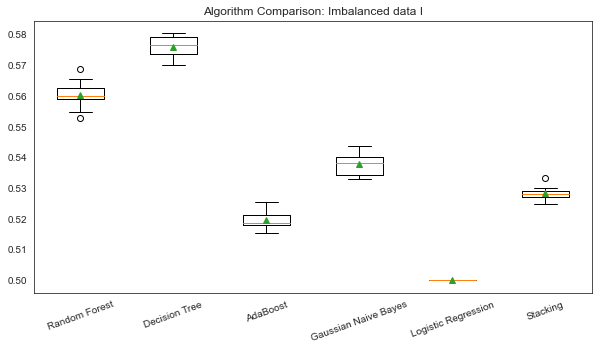

In [130]:
# compare Algorithms performance
algorithm_plot(results, model_name, 'Algorithm Comparison: Imbalanced data I') 

### Prediction with Balanced dataset

In [131]:
# to help with balancing of the data 
def oversample(feat_x, label_y):
    sm = SMOTE(random_state=42)
    x_bal, y_bal = sm.fit_resample(feat_x, label_y)
    return x_bal, y_bal

In [132]:
# resample dataset
x_train_bal, y_train_bal = oversample(x_train, y_train)

In [133]:
# count class
y_train_bal.value_counts()

1    100368
0    100368
Name: Casualty_Severity, dtype: int64

In [134]:
# create an empty lists for box chart
results_bal, model_name_bal = list(), list()

# evaluate the models
for name, model in models:
    evaluate = train_model(model, x_train_bal, y_train_bal)
    results_bal.append(evaluate)
    model_name_bal.append(name)
    results_table.loc['Balanced data I', name] = np.mean(evaluate)
    print("%s: %f (%f)" % (name, np.mean(evaluate), np.std(evaluate)))

Random Forest: 0.853276 (0.080563)
Decision Tree: 0.805885 (0.066751)
AdaBoost: 0.751929 (0.067120)
Gaussian Naive Bayes: 0.665043 (0.032135)
Logistic Regression: 0.602857 (0.007632)
Stacking: 0.854407 (0.083562)


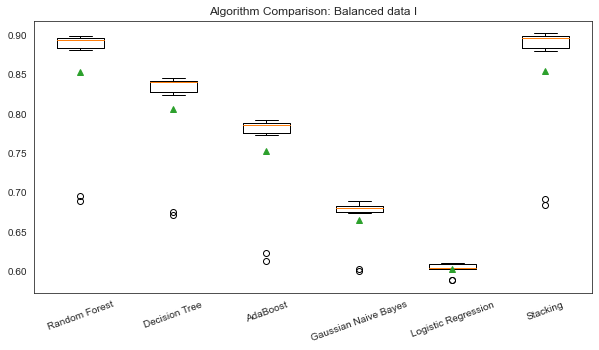

In [135]:
# compare Algorithms performance
algorithm_plot(results_bal, model_name_bal, 'Algorithm Comparison: Balanced data I') 

### Feature Scaling
Feature scaling is standard normalization of data. This is done so that no independent variable has more importance than any other independent variable.
All columns are standardized individually so that they follow the same distribution.

In [136]:
# All columns are standardized individually so that they follow the same distribution
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train_bal)

In [137]:
# create an empty lists for box chart
results_scale, model_name_scale = list(), list()

# evaluate the models
for name, model in models:
    evaluate = train_model(model, x_train_scale, y_train_bal)
    results_scale.append(evaluate)
    model_name_scale.append(name)
    results_table.loc['Scaling I', name] = np.mean(evaluate)
    print("%s: %f (%f)" % (name, np.mean(evaluate), np.std(evaluate)))

Random Forest: 0.854128 (0.080889)
Decision Tree: 0.805905 (0.067192)
AdaBoost: 0.751929 (0.067120)
Gaussian Naive Bayes: 0.664485 (0.031882)
Logistic Regression: 0.701424 (0.046355)
Stacking: 0.854985 (0.083885)


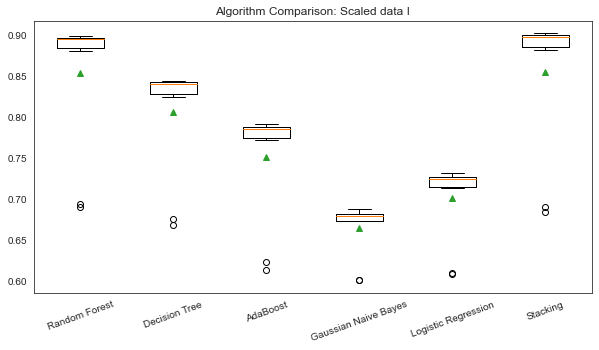

In [138]:
# compare Algorithms performance
algorithm_plot(results_scale, model_name_scale, 'Algorithm Comparison: Scaled data I') 

## Experiment II

### Prediction with Imbalanced dataset II

In [139]:
# create an empty lists for box chart
results_, model_name_ = list(), list()

# evaluate the models
for name, model in models:
    evaluate = train_model(model, x_train_, y_train_)
    results_.append(evaluate)
    model_name_.append(name)
    results_table.loc['Imbalanced data II', name] = np.mean(evaluate)
    print("%s: %f (%f)" % (name, np.mean(evaluate), np.std(evaluate)))

Random Forest: 0.562887 (0.004157)
Decision Tree: 0.580694 (0.008230)
AdaBoost: 0.518421 (0.004282)
Gaussian Naive Bayes: 0.542524 (0.010192)
Logistic Regression: 0.500000 (0.000000)
Stacking: 0.535903 (0.005372)


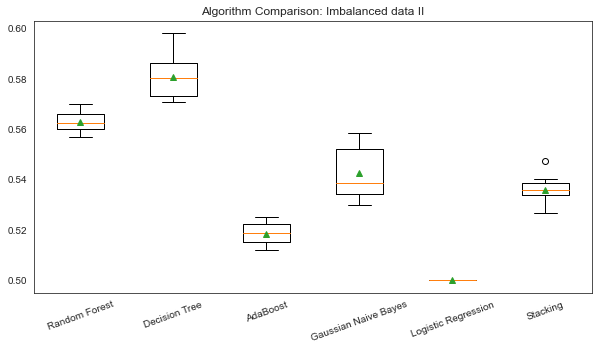

In [140]:
# compare Algorithms performance
algorithm_plot(results_, model_name_, 'Algorithm Comparison: Imbalanced data II') 

### Prediction with Balanced dataset II

In [141]:
# resample dataset
x_train_bal_, y_train_bal_ = oversample(x_train_, y_train_)

In [142]:
# create an empty lists for box chart
results_bal_, model_name_bal_ = list(), list()

# evaluate the models
for name, model in models:
    evaluate = train_model(model, x_train_bal_, y_train_bal_)
    results_bal_.append(evaluate)
    model_name_bal_.append(name)
    results_table.loc['Balanced data II', name] = np.mean(evaluate)
    print("%s: %f (%f)" % (name, np.mean(evaluate), np.std(evaluate)))

Random Forest: 0.897633 (0.122469)
Decision Tree: 0.851555 (0.103636)
AdaBoost: 0.834629 (0.096591)
Gaussian Naive Bayes: 0.691929 (0.038818)
Logistic Regression: 0.573266 (0.008223)
Stacking: 0.894186 (0.116065)


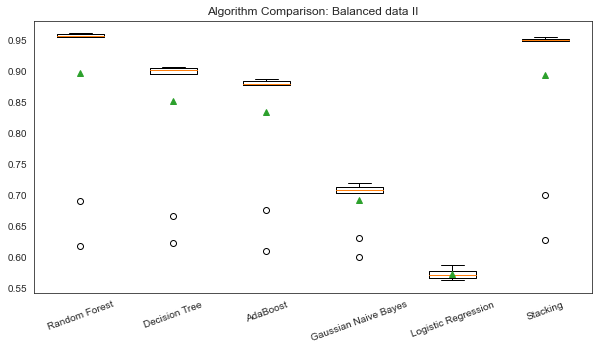

In [143]:
# compare Algorithms performance
algorithm_plot(results_bal_, model_name_bal_, 'Algorithm Comparison: Balanced data II') 

### Feature Scaling II

In [144]:
# All columns are standardized individually so that they follow the same distribution
scaler = StandardScaler()
x_train_scale_ = scaler.fit_transform(x_train_bal_)  

In [154]:
# create an empty lists for box chart
results_scale_, model_name_scale_ = list(), list()

# evaluate the models
for name, model in models:
    evaluate = train_model(model, x_train_scale_, y_train_bal_)
    results_scale_.append(evaluate)
    model_name_scale_.append(name)
    results_table.loc['Scaling II', name] = np.mean(evaluate)
    print("%s: %f (%f)" % (name, np.mean(evaluate), np.std(evaluate)))

Random Forest: 0.897355 (0.122600)
Decision Tree: 0.851957 (0.104153)
AdaBoost: 0.834629 (0.096591)
Gaussian Naive Bayes: 0.691141 (0.038637)
Logistic Regression: 0.730417 (0.041973)
Stacking: 0.892238 (0.115681)


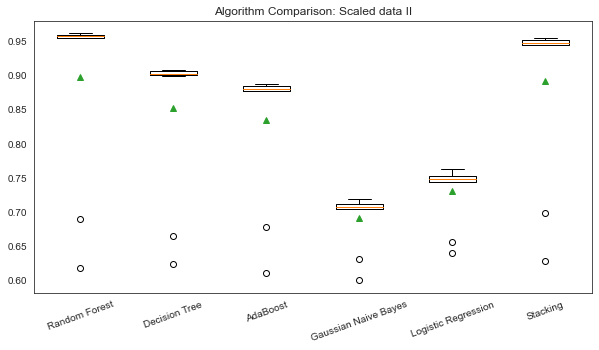

In [155]:
# compare Algorithms performance
algorithm_plot(results_scale_, model_name_scale_, 'Algorithm Comparison: Scaled data II') 

# Fine Tuning Hyperparameters

In [147]:
# stack all models
models_tune = [ DecisionTreeClassifier(),
            AdaBoostClassifier(),
            RandomForestClassifier(),
            GaussianNB(),
            LogisticRegression(solver='saga')]
          
names = ["DecisionTree","AdaBoostClassifier","RandomForest","GaussianNB","LogisticRegression"]

In [148]:
# possible hyper parameters
clf_params = {"criterion": ["gini", "entropy"],
               "min_samples_split" : list(range(2,6)),
               "max_depth": list(range(10,21))}

ada_params = {'n_estimators': [50,100,200,300]}

rf_params = {'n_estimators':[100,300],
                "max_depth": list(range(15,21))}

nb_params = {'var_smoothing': np.logspace(0,-9, num=10)}

logreg_params= {"C":np.logspace(-1, 1, 3),
                    "max_iter":[100, 1000]}

classifier_params = [clf_params, ada_params, rf_params, nb_params, logreg_params]

In [149]:
# create a timer
@contextmanager
def timer(title):
    start = timeit.default_timer()
    yield
    print("{} done in {:.0f}s".format(title, timeit.default_timer() - start))

# fine tune the model  
grid_result = {}
best_estimators = {}
for name, model, classifier_param in zip(names, models_tune, classifier_params):
    with timer("Model tuning"):
        clf = GridSearchCV(model, param_grid=classifier_param, scoring = "accuracy", n_jobs = -1,verbose = False)
        clf.fit(x_train_bal_,y_train_bal_)
        grid_result[name]=clf.best_score_
        best_estimators[name]=clf.best_estimator_
        print(name,'accuracy : %.3f'%grid_result[name])

DecisionTree accuracy : 0.846
Model tuning done in 95s
AdaBoostClassifier accuracy : 0.855
Model tuning done in 141s
RandomForest accuracy : 0.882
Model tuning done in 536s
GaussianNB accuracy : 0.694
Model tuning done in 2s
LogisticRegression accuracy : 0.620
Model tuning done in 264s


No improvement on the default parameters, hence, I will continue with the default parameters.

# Evaluation
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s

In [157]:
# result table
results_table = results_table.astype(float)
results_table['Best Score'] = results_table.idxmax(axis=1)
results_table
results_table

,Random Forest,Decision Tree,AdaBoost,Gaussian Naive Bayes,Logistic Regression,Stacking,Best Score
Imbalanced data I,0.5604,0.5760,0.5195,0.5378,0.5000,0.5282,Decision Tree
Balanced data I,0.8533,0.8059,0.7519,0.6650,0.6029,0.8544,Stacking
Scaling I,0.8541,0.8059,0.7519,0.6645,0.7014,0.8550,Stacking
Imbalanced data II,0.5629,0.5807,0.5184,0.5425,0.5000,0.5359,Decision Tree
Balanced data II,0.8976,0.8516,0.8346,0.6919,0.5733,0.8942,Random Forest
Scaling II,0.8974,0.8520,0.8346,0.6911,0.7304,0.8922,Random Forest


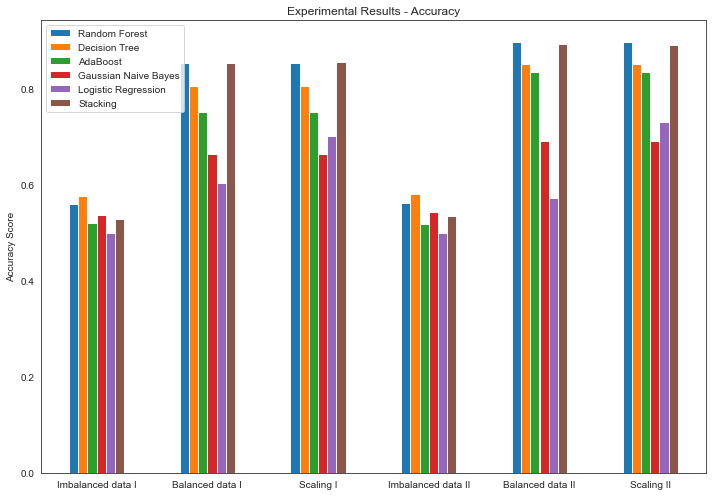

In [158]:
# plot the chart 
fig = plt.figure(figsize = (10,7))
ax = fig.gca()

results_table.plot(kind='bar', title='Experimental Results - Accuracy', ax=ax)
plt.xticks(rotation=0)
plt.ylabel('Accuracy Score')
plt.tight_layout()

In [159]:
# load govt prediction
gov_pred = pd.read_csv('cas_adjustment_lookup_2019.csv')
gov_pred = gov_pred [ gov_pred['accident_index'].str.startswith('2019')]
gov_pred.rename(columns=({'accident_index':'Accident_Index'}), inplace=True)

In [160]:
# merge the actual casualty severity
gov_pred = pd.merge(gov_pred, df_[['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference','Casualty_Severity']],
                    on=['Accident_Index','Vehicle_Reference', 'Casualty_Reference'], how='inner')

0.8275573238404356


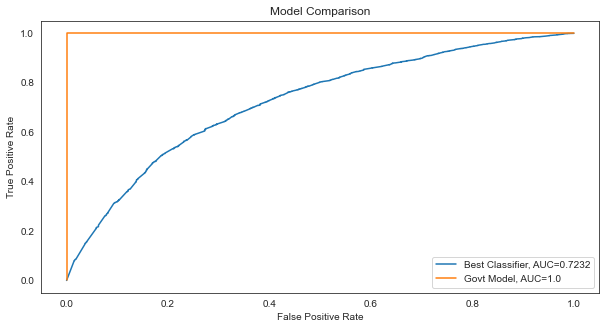

In [161]:
# compare my model with the govt's model
# predict with the best model
rf = RandomForestClassifier().fit(x_train_bal_, y_train_bal_)
print(rf.score(x_test_, y_test_))

# define metrics
y_pred_proba = rf.predict_proba(x_test_)[::,1]
fpr, tpr, _ = roc_curve(y_test_,  y_pred_proba)
auc = round(roc_auc_score(y_test_, y_pred_proba), 4)

# govt metrics
fpr_, tpr_, _ = roc_curve(gov_pred['Casualty_Severity'],  gov_pred['Adjusted_Slight'])
auc_ = round(roc_auc_score(gov_pred['Casualty_Severity'],  gov_pred['Adjusted_Slight']), 4)

# create ROC curve
plt.figure (figsize =(10,5))
plt.plot(fpr,tpr,label="Best Classifier, AUC="+str(auc))
plt.plot(fpr_,tpr_,label="Govt Model, AUC="+str(auc_))
plt.title('Model Comparison')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

The alternative approach in using the adjusted severity is to use them as the predicted variable instead of the casualty severity.

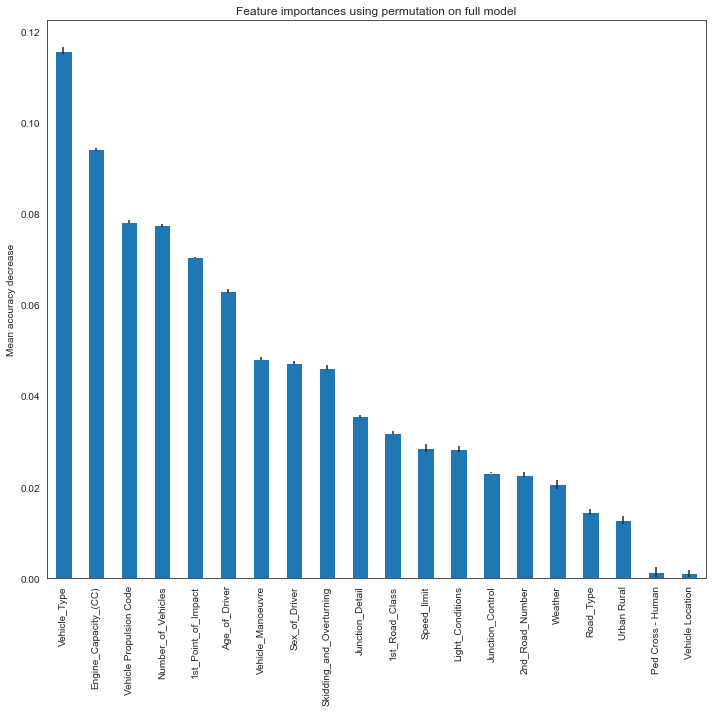

In [162]:
# plot the important features of the best model
feature_names = x_train_bal_.columns

result = permutation_importance(rf, x_train_bal_, y_train_bal_, n_repeats=10,
                                 random_state=0)

stacking_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots(figsize=(10,10))
stacking_importances.sort_values(ascending=False).plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

The above plot confirms that the most important feature is latitude and least important feature is Ped Road Maintenance Worker.

## Analysis on Number of Features
This section analyses the accuracy score per number of features used on the algorithms based on the best experiment.

In [163]:
# model wrapper function
def train_model2(classifier, features, label, test_feat, test_label):
    clf = classifier.fit(features, label)
    scores = clf.score(test_feat, test_label)
    return scores

# split the balanced data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(df_no_minus[features], df_no_minus['Casualty_Severity'], train_size=0.80, random_state=42, stratify= df_no_minus['Casualty_Severity'])

# sample the data
x_train, y_train = oversample(x_train, y_train)

In [164]:
# evaluate the models per number of features
feat_score = pd.DataFrame()

for name, model in models:
    for i in range(len(features)):

        f1score_select = SelectKBest(score_func=f_classif, k=i+1)
        x_train_new = f1score_select.fit_transform(x_train, y_train)
        x_test_new = f1score_select.transform(x_test)
    
        evaluate = train_model2(model, x_train_new, y_train, x_test_new, y_test)
        feat_score.loc[i + 1, name] = evaluate

[Text(0.5, 0, 'Number of Features'), Text(0, 0.5, 'Accuracy Score')]

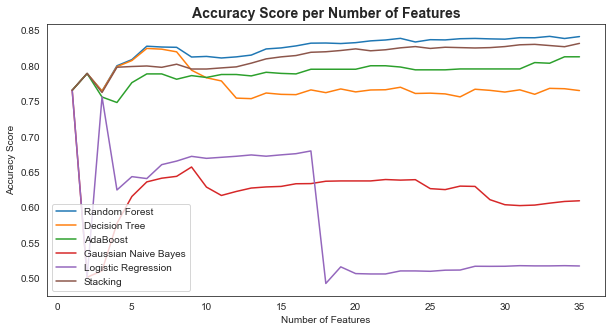

In [165]:
# plot chart
fig, ax = plt.subplots(figsize=(10,5))
feat_score.plot(ax=ax)
ax.set_title('Accuracy Score per Number of Features', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Features', ylabel='Accuracy Score')